# ***Universidad Nacional de Colombia-Sede Bogotá***

***Física Experimental de Partículas***

***Andrés Francisco Romero Bohada***

***Daniel Santiago Rodríguez Ruiz***

In [ ]:
# Versión de linux
!cat /etc/*release

# Set root folder
!mkdir -p APPS
!pwd
# Download and install root
!cd APPS && wget https://root.cern.ch/download/root_v6.28.06.Linux-ubuntu22-x86_64-gcc11.4.tar.gz
!cd APPS && tar -xf root_v6.28.06.Linux-ubuntu22-x86_64-gcc11.4.tar.gz

# Setting root paths
import sys
sys.path.append("/content/APPS/root/lib")
import ctypes
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTreePlayer.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')



DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.2 LTS"
PRETTY_NAME="Ubuntu 22.04.2 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.2 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy
/content
--2023-10-10 04:47:17--  https://root.cern.ch/download/root_v6.28.06.Linux-ubuntu22-x86_64-gcc11.4.tar.gz
Resolving root.cern.ch (root.cern.ch)... 188.184.49.144, 2001:1458:d00:55::100:c
Connecting to root.cern.ch (root.cern.ch)|188.184.49.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306541479 (292M) [application/x-gzip]
Saving to: ‘root_v6.28.06.Linux-ubuntu22-x86_64-gcc11.4.tar.gz.1’

root_v6.28.06.Linux 100%[===================>] 292.34M  65.2MB/s    in 4.4s   

<CDLL '/content/APPS/root/lib/libGraf.so', handle 5639c66a2f70 at 0x7ec0d413d900>

In [ ]:
import ROOT
f = ROOT.TFile.Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root")
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)
tree = f.Get("JetRecoTree")
tree.Print()
tree.GetEntries()
canvas = ROOT.TCanvas("Canvas", "", 800, 600)

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


#  *1. Compare the leading truth jet pT with the leading reco jet pT, with and without event weights.*


*Para R4 jets*

In [ ]:
hist_RecoJets_R4_pt= ROOT.TH1F("RecoJets_R4_pt","RecoJets R4 pt; pt; Events ",50,10,200)
hist_Lead_RecoJets_R4_pt= ROOT.TH1F("Lead_RecoJets_R4_pt","Lead RecoJets R4 pt; pt; Events ",50,10,200)
for event in tree:
    if tree.RecoJets_R4_pt.size()>0:
        hist_Lead_RecoJets_R4_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000,tree.EventWeight)
        for tr in range(tree.RecoJets_R4_pt.size()):
            hist_RecoJets_R4_pt.Fill(tree.RecoJets_R4_pt.at(tr)/1000,tree.EventWeight)
print("Done!")

Done!


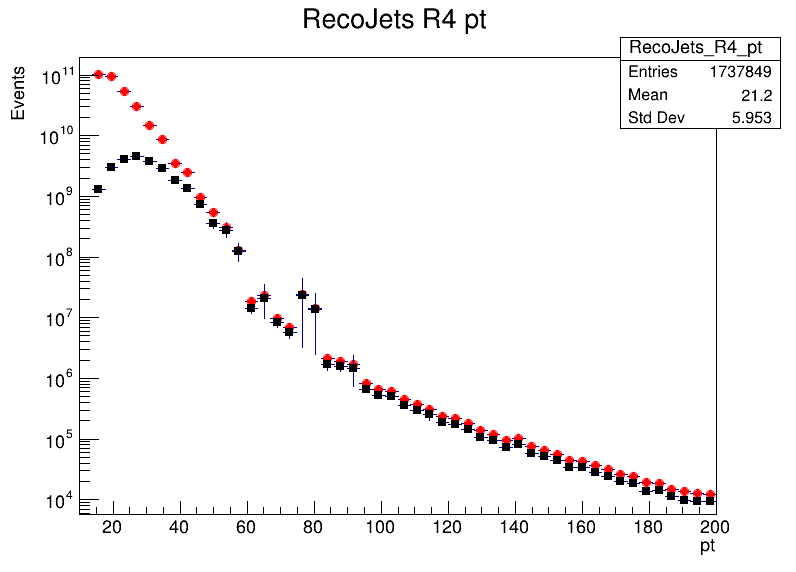

In [ ]:
hist_RecoJets_R4_pt.SetMarkerColor(2)
hist_RecoJets_R4_pt.SetMarkerStyle(20)
hist_RecoJets_R4_pt.Draw()
hist_Lead_RecoJets_R4_pt.SetMarkerStyle(21)
hist_Lead_RecoJets_R4_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

In [ ]:
hist_RecoJets_R4_pt_0peso= ROOT.TH1F("RecoJets_R4_pt_0peso","RecoJets R4 pt sin pesos; pt; Events ",50,10,200)
hist_Lead_RecoJets_R4_pt_0peso= ROOT.TH1F("Lead_RecoJets_R4_pt_0peso","Lead RecoJets R4 pt sin pesos; pt; Events ",50,10,200)
for event in tree:
    if tree.RecoJets_R4_pt.size()>0:
        hist_Lead_RecoJets_R4_pt_0peso.Fill(tree.RecoJets_R4_pt.at(0)/1000)
        for tr in range(tree.RecoJets_R4_pt.size()):
            hist_RecoJets_R4_pt_0peso.Fill(tree.RecoJets_R4_pt.at(tr)/1000)
print("Done!")

Done!


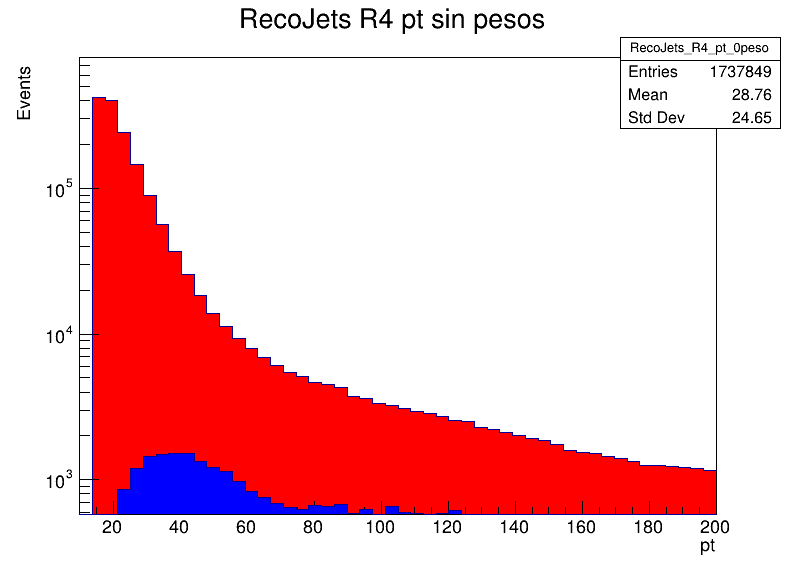

In [ ]:
hist_RecoJets_R4_pt_0peso.SetFillColor(2)
hist_RecoJets_R4_pt_0peso.Draw()
hist_Lead_RecoJets_R4_pt_0peso.SetFillColor(4)
hist_Lead_RecoJets_R4_pt_0peso.Draw("same")
canvas.SetLogy()
canvas.Draw()

*Para R10 jets*

In [ ]:
hist_RecoJets_R10_pt= ROOT.TH1F("RecoJets_R10_pt","RecoJets R10 pt; pt; Events ",50,140,200)
hist_Lead_RecoJets_R10_pt= ROOT.TH1F("Lead_RecoJets_R10_pt","Lead RecoJets R10 pt; pt; Events ",50,140,200)
for event in tree:
    if tree.RecoJets_R10_pt.size()>0:
        hist_Lead_RecoJets_R10_pt.Fill(tree.RecoJets_R10_pt.at(0)/1000,tree.EventWeight)
        for tr in range(tree.RecoJets_R10_pt.size()):
            hist_RecoJets_R10_pt.Fill(tree.RecoJets_R10_pt.at(tr)/1000,tree.EventWeight)
print("Done!")

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: RecoJets_R10_pt (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: Lead_RecoJets_R10_pt (Potential memory leak).


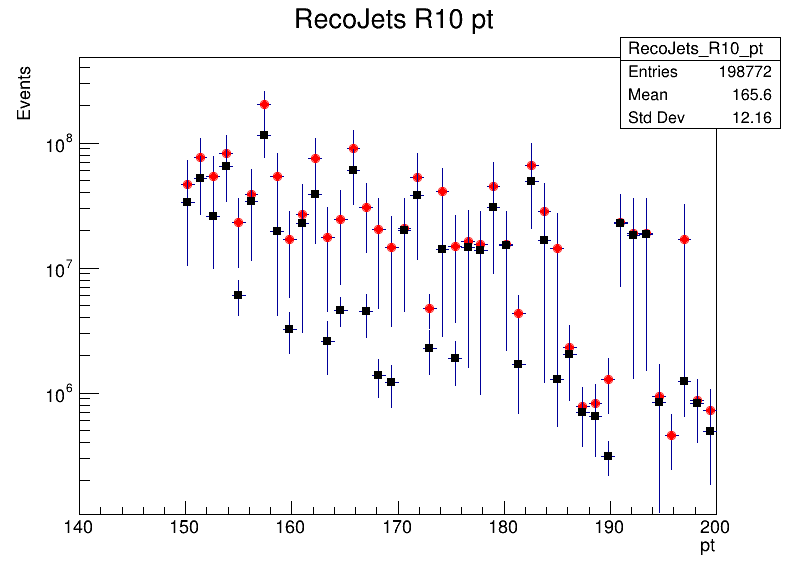

In [ ]:
hist_RecoJets_R10_pt.SetMarkerColor(2)
hist_RecoJets_R10_pt.SetMarkerStyle(20)
hist_RecoJets_R10_pt.Draw()
hist_Lead_RecoJets_R10_pt.SetMarkerStyle(21)
hist_Lead_RecoJets_R10_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

In [ ]:
hist_RecoJets_R10_pt_0peso= ROOT.TH1F("RecoJets_R10_pt_0peso","RecoJets R10 pt sin pesos; pt; Events ",50,140,200)
hist_Lead_RecoJets_R10_pt_0peso= ROOT.TH1F("Lead_RecoJets_R10_pt_0peso","Lead RecoJets R10 pt sin pesos; pt; Events ",50,140,200)
for event in tree:
    if tree.RecoJets_R10_pt.size()>0:
        hist_Lead_RecoJets_R10_pt_0peso.Fill(tree.RecoJets_R10_pt.at(0)/1000)
        for tr in range(tree.RecoJets_R10_pt.size()):
            hist_RecoJets_R10_pt_0peso.Fill(tree.RecoJets_R10_pt.at(tr)/1000)
print("Done!")

Done!


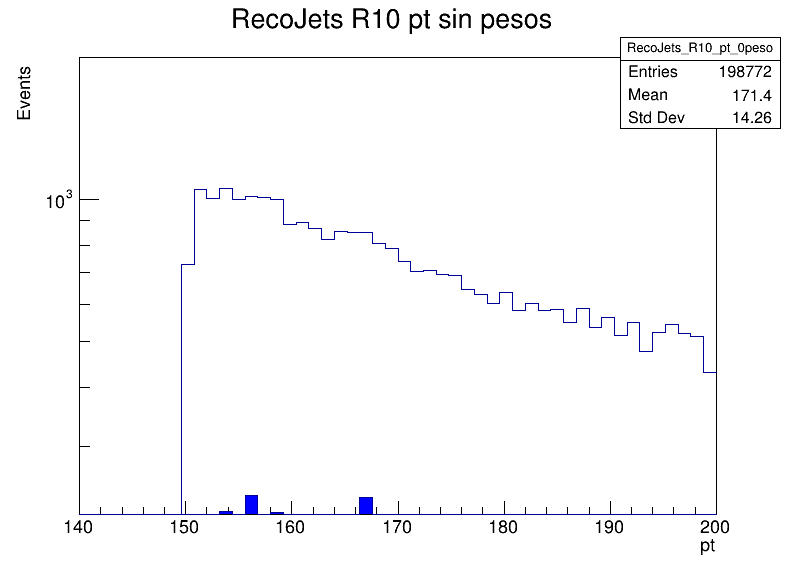

In [ ]:
hist_RecoJets_R10_pt_0peso.SetFillColor(0)
hist_RecoJets_R10_pt_0peso.Draw()
hist_Lead_RecoJets_R10_pt_0peso.SetFillColor(4)
hist_Lead_RecoJets_R10_pt_0peso.Draw("same")
canvas.SetLogy()
canvas.Draw()

*Comparación Lead y Truth Jets R4 (pt)*

In [ ]:
hist_Lead_TruthJets_R4_pt_0peso= ROOT.TH1F("Lead_TruthJets_R4_pt_0peso","Lead Truth Jets R4_pt sin pesos; pt; Events ",50,10,200)
hist_Lead_TruthJets_R4_pt= ROOT.TH1F("Lead_TruthJets_R4_pt","Lead Truth Jets R4_pt; pt; Events ",50,10,200)

for event in tree:
    if tree.TruthJets_R4_pt.size()>0:
        hist_Lead_TruthJets_R4_pt_0peso.Fill(tree.TruthJets_R4_pt.at(0)/1000)
        hist_Lead_TruthJets_R4_pt.Fill(tree.TruthJets_R4_pt.at(0)/1000,tree.EventWeight)

print("Done!")

Done!


In [ ]:
hist_Lead_RecoJets_R4_pt_0peso= ROOT.TH1F("Lead_RecoJets_R4_pt_0peso","Lead Reco Jets R4_pt sin pesos; pt; Events ",50,10,200)
hist_Lead_RecoJets_R4_pt= ROOT.TH1F("Lead_RecoJets_R4_pt","Lead Reco Jets R4_pt; pt; Events ",50,10,200)

for event in tree:
    if tree.RecoJets_R4_pt.size()>0:
        hist_Lead_RecoJets_R4_pt_0peso.Fill(tree.RecoJets_R4_pt.at(0)/1000)
        hist_Lead_RecoJets_R4_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000,tree.EventWeight)

print("Done!")

Done!


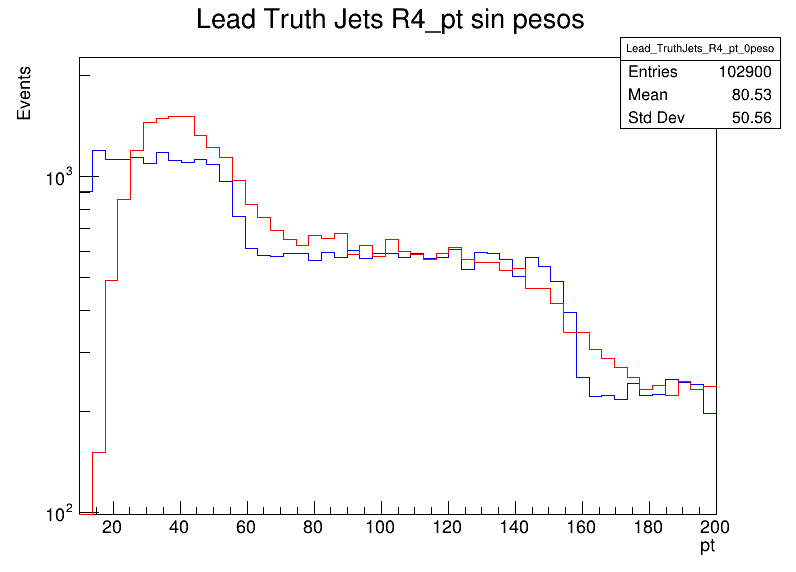

In [ ]:
hist_Lead_TruthJets_R4_pt_0peso.SetLineColor(4)
hist_Lead_TruthJets_R4_pt_0peso.SetFillColor(0)
hist_Lead_TruthJets_R4_pt_0peso.Draw()
hist_Lead_RecoJets_R4_pt_0peso.SetLineColor(2)
hist_Lead_RecoJets_R4_pt_0peso.SetFillColor(0)
hist_Lead_RecoJets_R4_pt_0peso.Draw("same")
canvas.SetLogy()
canvas.Draw()

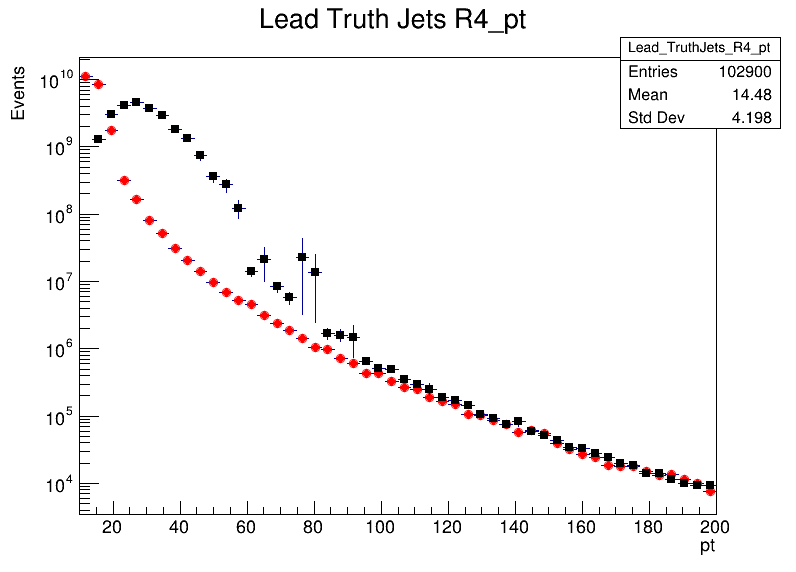

In [ ]:
hist_Lead_TruthJets_R4_pt.SetMarkerColor(2)
hist_Lead_TruthJets_R4_pt.SetMarkerStyle(20)
hist_Lead_TruthJets_R4_pt.Draw()
hist_Lead_RecoJets_R4_pt.SetMarkerStyle(21)
hist_Lead_RecoJets_R4_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

*Comparación Lead y Truth Jets R10 (pt)*

In [ ]:
hist_Lead_TruthJets_R10_pt_0peso= ROOT.TH1F("Lead_TruthJets_R10_pt_0peso","Lead Truth Jets R10_pt sin pesos; pt; Events ",50,10,200)
hist_Lead_TruthJets_R10_pt= ROOT.TH1F("Lead_TruthJets_R10_pt","Lead Truth Jets R10_pt; pt; Events ",50,10,200)

for event in tree:
    if tree.TruthJets_R10_pt.size()>0:
        hist_Lead_TruthJets_R10_pt_0peso.Fill(tree.TruthJets_R10_pt.at(0)/1000)
        hist_Lead_TruthJets_R10_pt.Fill(tree.TruthJets_R10_pt.at(0)/1000,tree.EventWeight)

print("Done!")

Done!


In [ ]:
hist_Lead_RecoJets_R10_pt_0peso= ROOT.TH1F("Lead_RecoJets_R10_pt_0peso","Lead Reco Jets R10_pt sin pesos; pt; Events ",50,10,200)
hist_Lead_RecoJets_R10_pt= ROOT.TH1F("Lead_RecoJets_R10_pt","Lead Reco Jets R10_pt; pt; Events ",50,10,200)

for event in tree:
    if tree.RecoJets_R10_pt.size()>0:
        hist_Lead_RecoJets_R10_pt_0peso.Fill(tree.RecoJets_R10_pt.at(0)/1000)
        hist_Lead_RecoJets_R10_pt.Fill(tree.RecoJets_R10_pt.at(0)/1000,tree.EventWeight)

print("Done!")

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: Lead_RecoJets_R10_pt_0peso (Potential memory leak).


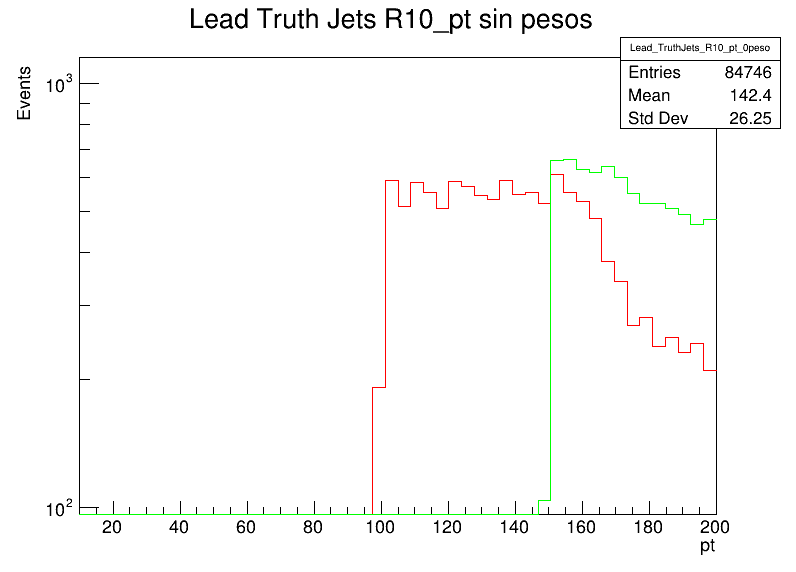

In [ ]:
hist_Lead_TruthJets_R10_pt_0peso.SetLineColor(2)
hist_Lead_TruthJets_R10_pt_0peso.SetFillColor(0)
hist_Lead_TruthJets_R10_pt_0peso.Draw()
hist_Lead_RecoJets_R10_pt_0peso.SetLineColor(3)
hist_Lead_RecoJets_R10_pt_0peso.SetFillColor(0)
hist_Lead_RecoJets_R10_pt_0peso.Draw("same")
canvas.SetLogy()
canvas.Draw()

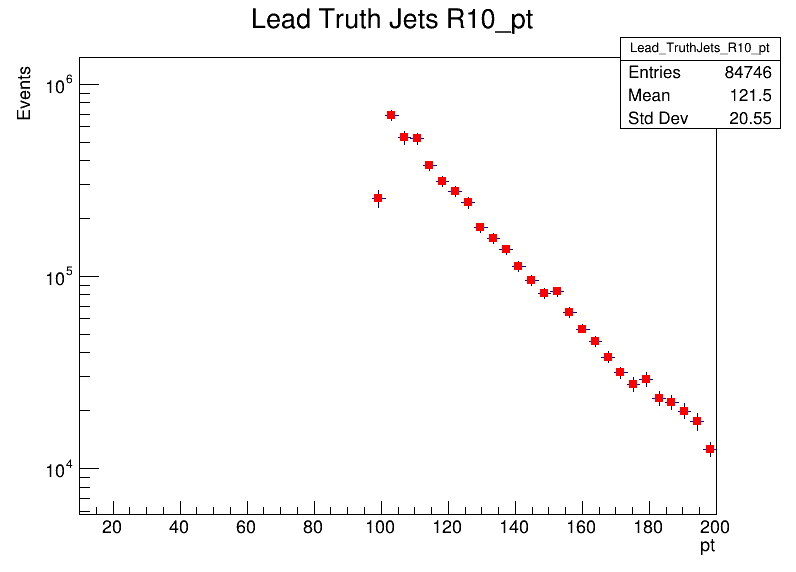

In [ ]:
hist_Lead_TruthJets_R10_pt.SetMarkerColor(2)
hist_Lead_TruthJets_R10_pt.SetMarkerStyle(21)
hist_Lead_TruthJets_R10_pt.Draw()
hist_Lead_RecoJets_R10_pt.SetMarkerColor(5)
hist_Lead_RecoJets_R10_pt.SetMarkerStyle(22)
hist_Lead_RecoJets_R10_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

# *2. Repeat for all jets pT.*





*Para Reco R4*

In [ ]:
hist_TruthJets_R4_pt_0peso= ROOT.TH1F("TruthJets_R4_pt_0peso"," Truth Jets R4_pt sin pesos; pt; Events ",50,10,200)
hist_TruthJets_R4_pt= ROOT.TH1F("TruthJets_R4_pt"," Truth Jets R4_pt; pt; Events ",50,10,200)

for event in tree:
    if tree.TruthJets_R4_pt.size()>0:
        hist_TruthJets_R4_pt_0peso.Fill(tree.TruthJets_R4_pt.at(0)/1000)
        hist_TruthJets_R4_pt.Fill(tree.TruthJets_R4_pt.at(0)/1000,tree.EventWeight)
print("Done!")

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: TruthJets_R4_pt_0peso (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: TruthJets_R4_pt (Potential memory leak).


In [ ]:
hist_RecoJets_R4_pt_0peso= ROOT.TH1F("RecoJets_R4_pt_0peso"," Reco Jets R4_pt sin pesos; pt; Events ",50,10,200)
hist_RecoJets_R4_pt= ROOT.TH1F("RecoJets_R4_pt"," Reco Jets R4_pt; pt; Events ",50,10,200)

for event in tree:
    if tree.RecoJets_R4_pt.size()>0:
        hist_RecoJets_R4_pt_0peso.Fill(tree.RecoJets_R4_pt.at(0)/1000)
        hist_RecoJets_R4_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000,tree.EventWeight)
print("Done!")

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: RecoJets_R4_pt_0peso (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: RecoJets_R4_pt (Potential memory leak).


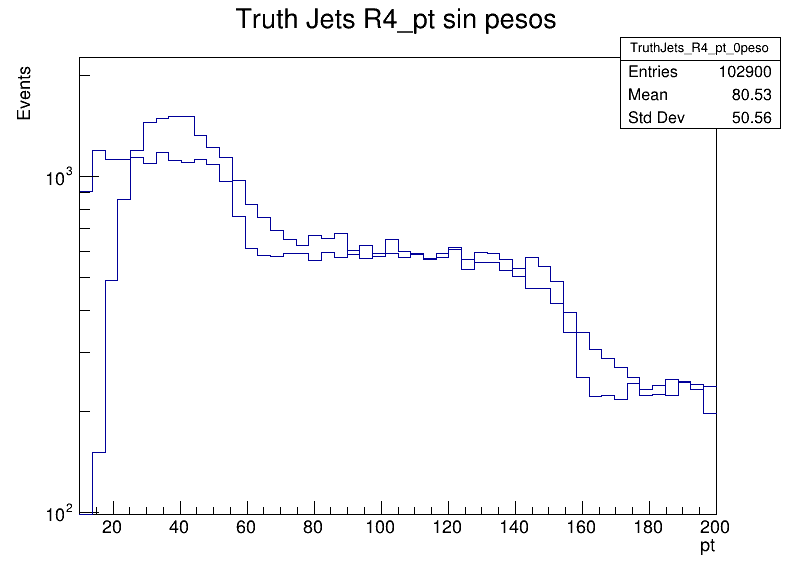

In [ ]:
hist_TruthJets_R4_pt_0peso.SetFillColor(0)
hist_TruthJets_R4_pt_0peso.Draw()
hist_RecoJets_R4_pt_0peso.SetFillColor(0)
hist_RecoJets_R4_pt_0peso.Draw("same")
canvas.SetLogy()
canvas.Draw()

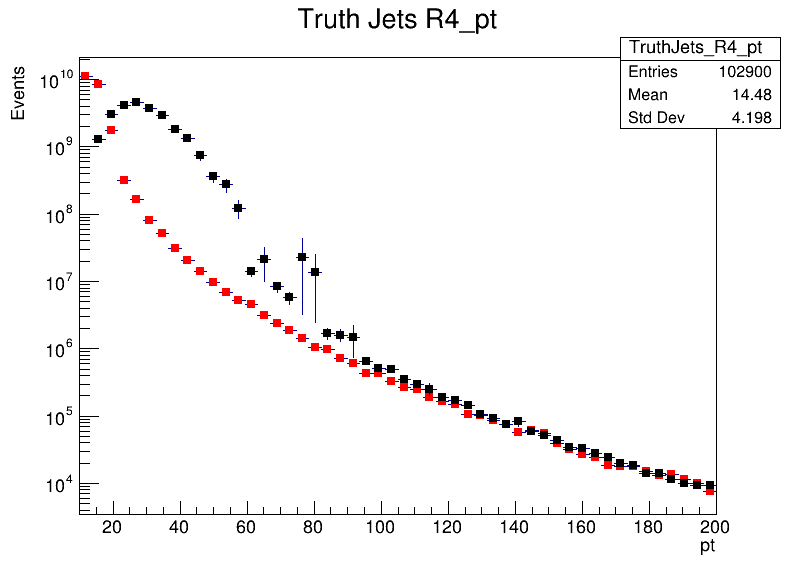

In [ ]:
hist_TruthJets_R4_pt.SetMarkerColor(2)
hist_TruthJets_R4_pt.SetMarkerStyle(21)
hist_TruthJets_R4_pt.Draw()
hist_RecoJets_R4_pt.SetMarkerStyle(21)
hist_RecoJets_R4_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

*Para Reco R10*

In [ ]:
hist_TruthJets_R10_pt_0peso= ROOT.TH1F("TruthJets_R10_pt_0peso"," Truth Jets R10_pt sin pesos; pt; Events ",50,10,1000)
hist_TruthJets_R10_pt= ROOT.TH1F("TruthJets_R4_pt"," Truth Jets R10_pt; pt; Events ",50,10,1000)

for event in tree:
    if tree.TruthJets_R10_pt.size()>0:
        hist_TruthJets_R10_pt_0peso.Fill(tree.TruthJets_R10_pt.at(0)/1000)
        hist_TruthJets_R10_pt.Fill(tree.TruthJets_R10_pt.at(0)/1000,tree.EventWeight)
print("Done!")

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: TruthJets_R10_pt_0peso (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: TruthJets_R4_pt (Potential memory leak).


In [ ]:
hist_RecoJets_R10_pt_0peso= ROOT.TH1F("RecoJets_R10_pt_0peso"," Reco Jets R10_pt sin pesos; pt; Events ",50,10,1000)
hist_RecoJets_R10_pt= ROOT.TH1F("RecoJets_R4_pt"," Reco Jets R10_pt; pt; Events ",50,10,1000)

for event in tree:
    if tree.RecoJets_R10_pt.size()>0:
        hist_RecoJets_R10_pt_0peso.Fill(tree.RecoJets_R10_pt.at(0)/1000)
        hist_RecoJets_R10_pt.Fill(tree.RecoJets_R10_pt.at(0)/1000,tree.EventWeight)
print("Done!")

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: RecoJets_R10_pt_0peso (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: RecoJets_R4_pt (Potential memory leak).


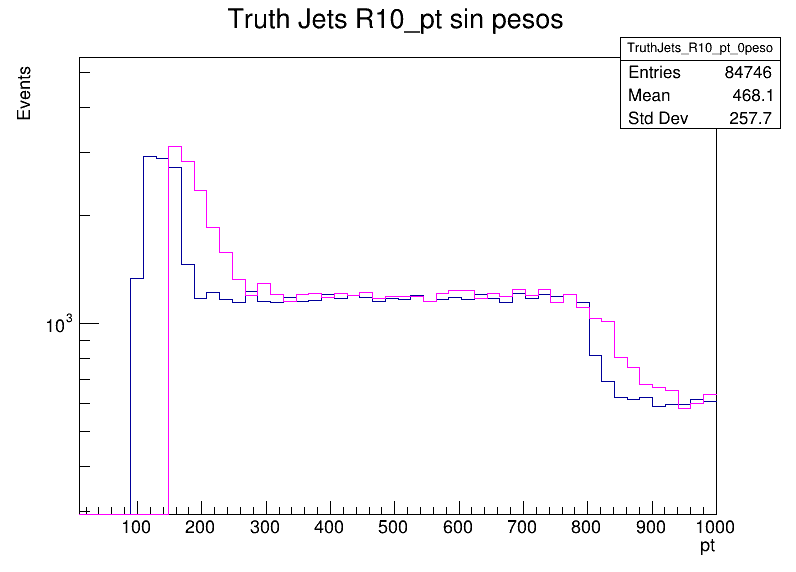

In [ ]:
hist_TruthJets_R10_pt_0peso.SetFillColor(0)
hist_TruthJets_R10_pt_0peso.Draw()
hist_RecoJets_R10_pt_0peso.SetFillColor(0)
hist_RecoJets_R10_pt_0peso.SetLineColor(6)
hist_RecoJets_R10_pt_0peso.Draw("same")
canvas.SetLogy()
canvas.Draw()

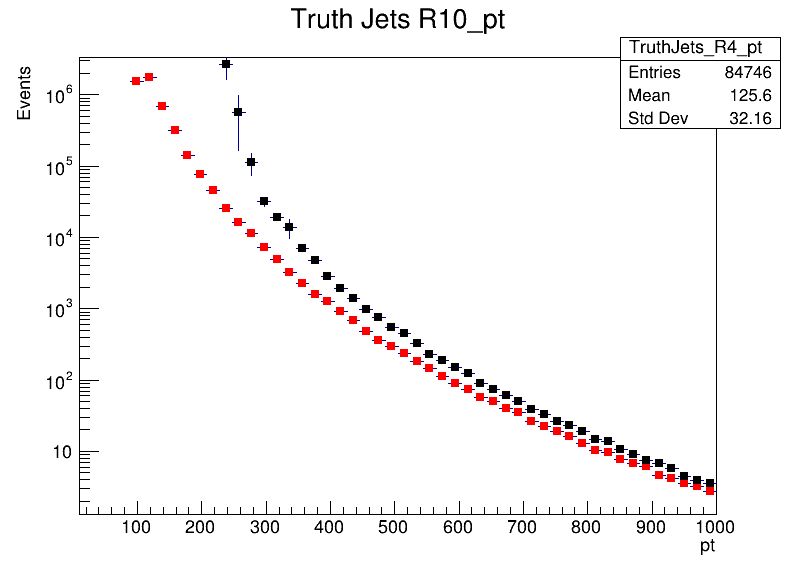

In [ ]:
hist_TruthJets_R10_pt.SetMarkerColor(2)
hist_TruthJets_R10_pt.SetMarkerStyle(21)
hist_TruthJets_R10_pt.Draw()
hist_RecoJets_R10_pt.SetMarkerStyle(21)
hist_RecoJets_R10_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

# *3. Make plots for reco and truth jet pT vs. pileup. Interpret your results.*

TProfile (const char *name, const char *title, Int_t nbinsx, Double_t xlow, Double_t xup, Double_t ylow, Double_t yup, Option_t *option="")
 	Constructor for Profile histograms with range in y.

In [ ]:
hist_jetpt_npv = ROOT.TH2F("jetpt_NPV","Jet R4 pt vs NPV; Jet pt; NPV ; Events ",20, 0, 200, 50,1,50 )
prof_jetpt_npv = ROOT.TProfile("Profile Reco-jet pT vs. NPV","Profile Jet R4 pt vs NPV; jet pT ; NPV ",50, 0, 200,1,50)
for event in tree:
    if tree.RecoJets_R4_pt.size()>0:
        if tree.RecoJets_R4_pt.at(0)>20000:
            for tr in range(tree.RecoJets_R4_pt.size()):
                hist_jetpt_npv.Fill(tree.RecoJets_R4_pt.at(tr)/1000, tree.NPV, tree.EventWeight)
                prof_jetpt_npv.Fill(tree.RecoJets_R4_pt.at(tr)/1000, tree.NPV, tree.EventWeight)
print("Done!")


Done!


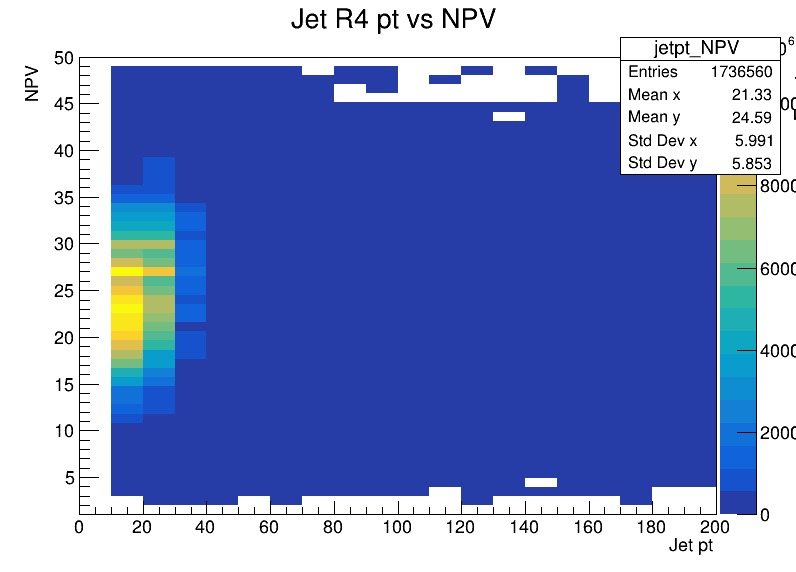

In [ ]:
hist_jetpt_npv.Draw("COLZ")
canvas.SetLogy(0)
canvas.Draw()

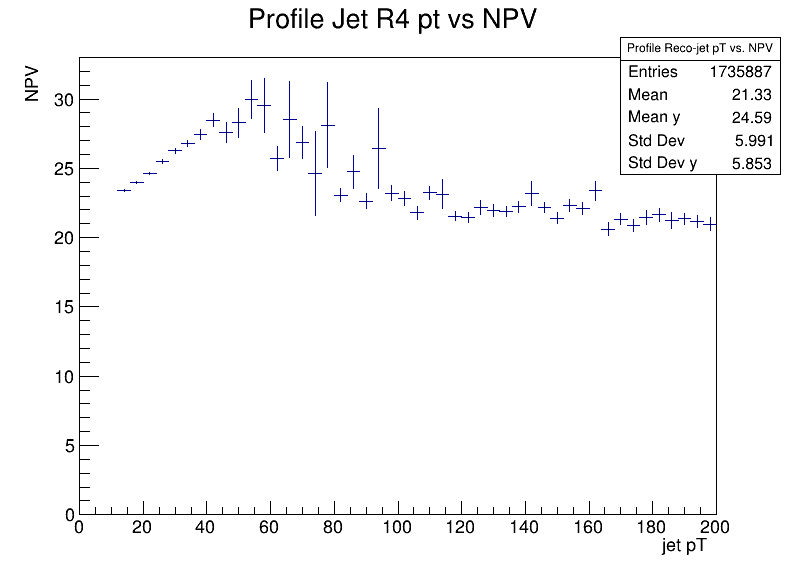

In [ ]:
prof_jetpt_npv.Draw()
canvas.Draw()

In [ ]:
hist_RecoJets_R10_pt_npv = ROOT.TH2F("RecoJets_R10_pt_NPV","RecoJets_R10_pt vs NPV; Jet pt; NPV ; Events ",60, 140, 320, 50,1,50 )
prof_RecoJets_R10_pt_npv = ROOT.TProfile("Profile RecoJets_R10_pt vs. NPV","Profile RecoJets_R10_pt vs NPV; jet pT ; NPV ",60, 140, 320,1,50)
for event in tree:
    if tree.RecoJets_R10_pt.size()>0:
        if tree.RecoJets_R10_pt.at(0)>20000:
            for tr in range(tree.RecoJets_R10_pt.size()):
                hist_RecoJets_R10_pt_npv.Fill(tree.RecoJets_R10_pt.at(tr)/1000, tree.NPV, tree.EventWeight)
                prof_RecoJets_R10_pt_npv.Fill(tree.RecoJets_R10_pt.at(tr)/1000, tree.NPV, tree.EventWeight)
print("Done!")


Done!


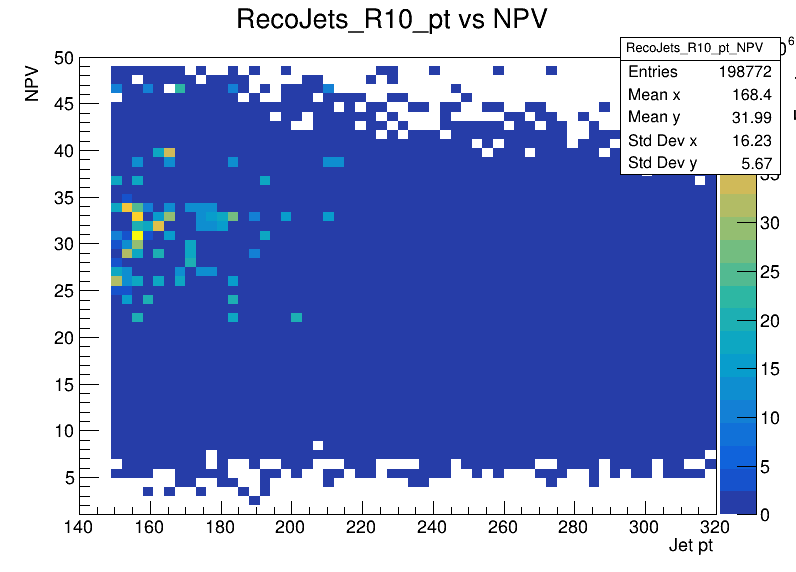

In [ ]:
hist_RecoJets_R10_pt_npv.Draw("COLZ")
canvas.SetLogy(0)
canvas.Draw()

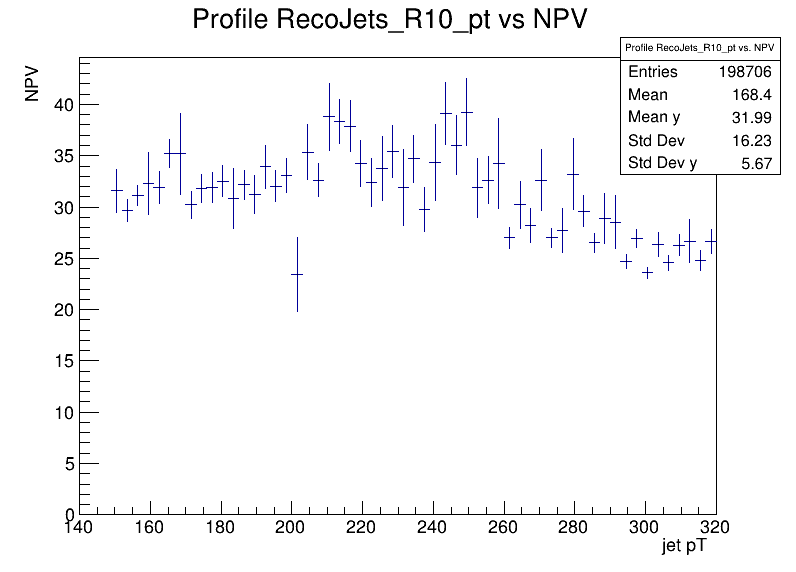

In [ ]:
prof_RecoJets_R10_pt_npv.Draw()
canvas.Draw()

In [ ]:
hist_TruthJets_R4_pt_npv = ROOT.TH2F("TruthJets_R4_pt_NPV","TruthJets_R4_pt vs NPV; Jet pt; NPV ; Events ",100, 0, 200, 49,1,50 )
prof_TruthJets_R4_pt_npv = ROOT.TProfile("Profile TruthJets_R4_pt vs. NPV","Profile TruthJets_R4_pt vs NPV; jet pT ; NPV ",100, 0, 200,1,50)
for event in tree:
    if tree.TruthJets_R4_pt.size()>0:
        if tree.TruthJets_R4_pt.at(0)>20000:
            for tr in range(tree.TruthJets_R4_pt.size()):
                hist_TruthJets_R4_pt_npv.Fill(tree.TruthJets_R4_pt.at(tr)/1000, tree.NPV, tree.EventWeight)
                prof_TruthJets_R4_pt_npv.Fill(tree.TruthJets_R4_pt.at(tr)/1000, tree.NPV, tree.EventWeight)
print("Done!")

Done!


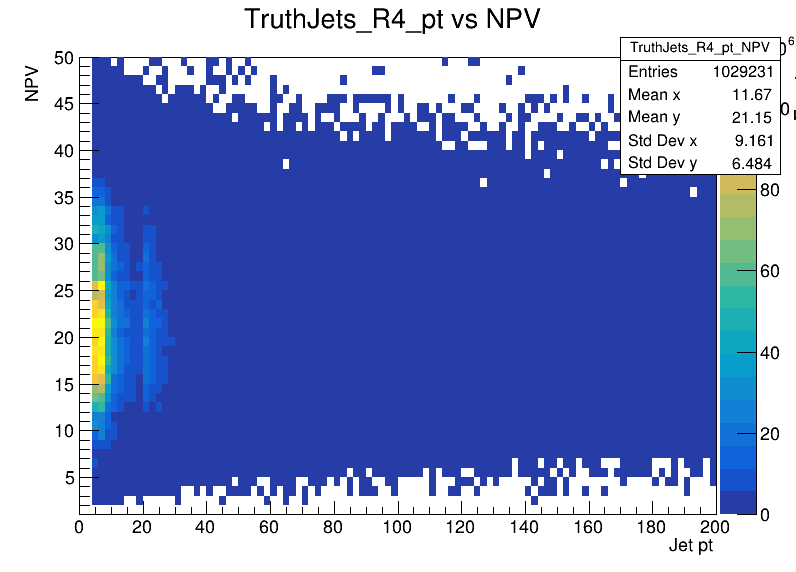

In [ ]:
hist_TruthJets_R4_pt_npv.Draw("COLZ")
canvas.Draw()

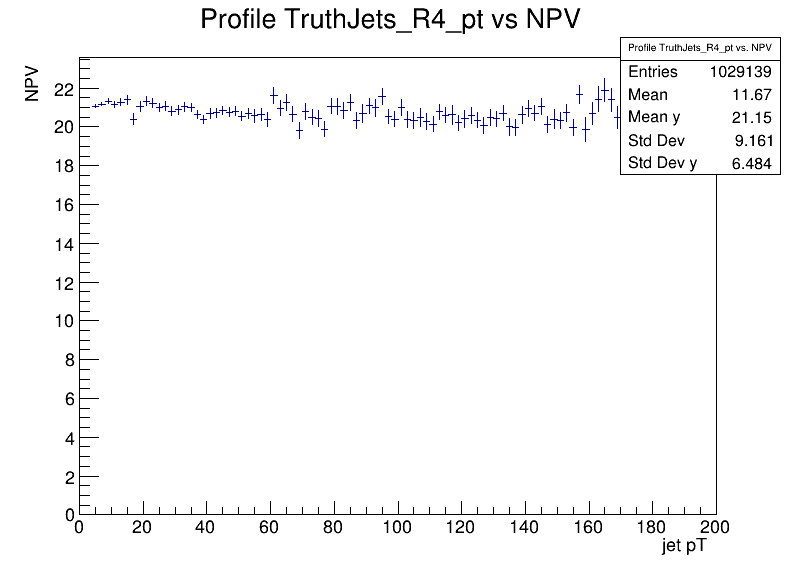

In [ ]:
prof_TruthJets_R4_pt_npv.Draw()
canvas.Draw()

In [ ]:
hist_TruthJets_R10_pt_npv = ROOT.TH2F("TruthJets_R10_pt_NPV","TruthJets_R10_pt vs NPV; Jet pt; NPV ; Events ",20, 100, 200, 50,1,50 )
prof_TruthJets_R10_pt_npv = ROOT.TProfile("Profile TruthJets_R10_pt vs. NPV","Profile TruthJets_R10_pt vs NPV; jet pT ; NPV ",50, 100, 200,1,50)
for event in tree:
    if tree.TruthJets_R10_pt.size()>0:
        if tree.TruthJets_R10_pt.at(0)>20000:
            for tr in range(tree.TruthJets_R10_pt.size()):
                hist_TruthJets_R10_pt_npv.Fill(tree.TruthJets_R10_pt.at(tr)/1000, tree.NPV, tree.EventWeight)
                prof_TruthJets_R10_pt_npv.Fill(tree.TruthJets_R10_pt.at(tr)/1000, tree.NPV, tree.EventWeight)
print("Done!")

Done!


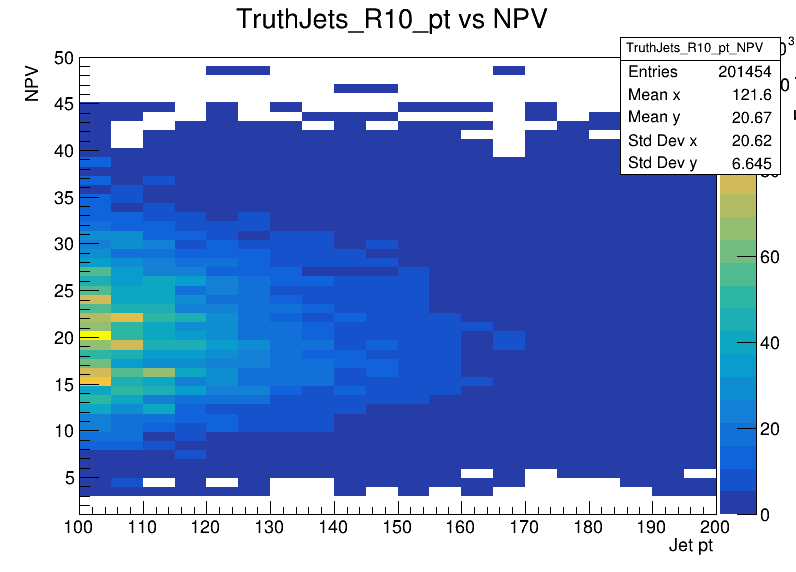

In [ ]:
hist_TruthJets_R10_pt_npv.Draw("COLZ")
canvas.Draw()

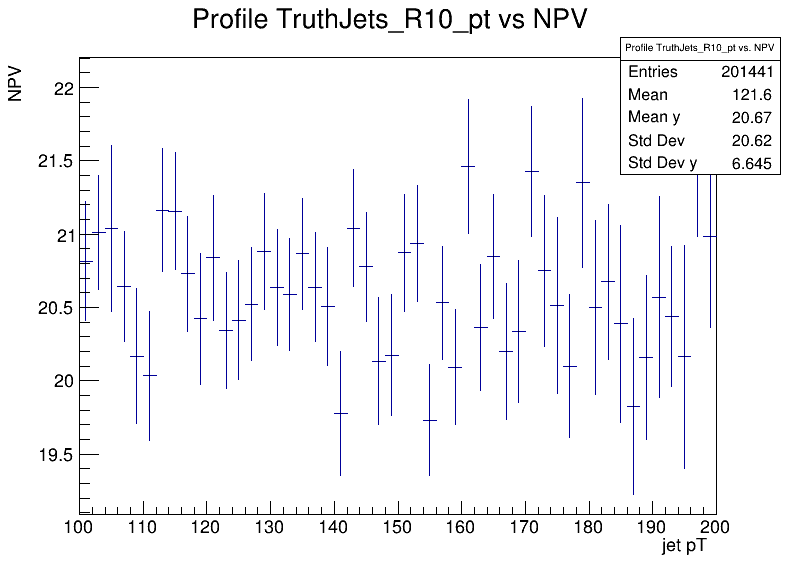

In [ ]:
prof_TruthJets_R10_pt_npv.Draw()
canvas.Draw()

# *4. Use a |JVF|>0.5 cut to compare the leading jet pT for truth jets, reco jets (w.o. the cut), and reco jets (with the cut)*



In [ ]:
hist_TruthJets_R4_eta= ROOT.TH1F("TruthJets_R4_eta","TruthJets R4 eta; eta; Events ",50,10,200)
hist_TruthJets_R4_phi= ROOT.TH1F("TruthJets_R4_phi","TruthJets R4 phi; phi; Events ",50,10,200)
hist_TruthJets_R4_pt= ROOT.TH1F("TruthJets_R4_pt","TruthJets R4 pt; pt; Events ",50,10,200)
hist_TruthJets_R4_m= ROOT.TH1F("TruthJets_R4_m","TruthJets R4 m; m; Events ",50,10,200)
hist_DR_reco_truth=ROOT.TH1F("Delta R reco","DeltaR; #Delta R; Events",20,0,2)

for event in tree:
    if tree.TruthJets_R4_pt.size()>0 and tree.TruthJets_R4_pt.at(0) > 20000:
        truthJet = ROOT.TLorentzVector()
        truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt.at(0), tree.TruthJets_R4_eta.at(0), tree.TruthJets_R4_phi.at(0), tree.TruthJets_R4_m.at(0))

        if tree.RecoJets_R4_pt.size()>0 and abs(tree.RecoJets_R4_jvf.at(0)) > 0.5:
            recoJet = ROOT.TLorentzVector()
            recoJet.SetPtEtaPhiM(tree.RecoJets_R4_pt.at(0), tree.RecoJets_R4_eta.at(0), tree.RecoJets_R4_phi.at(0), tree.RecoJets_R4_m.at(0))


            hist_DR_reco_truth.Fill(truthJet.DeltaR(recoJet), tree.EventWeight)
print("Done!")

Done!


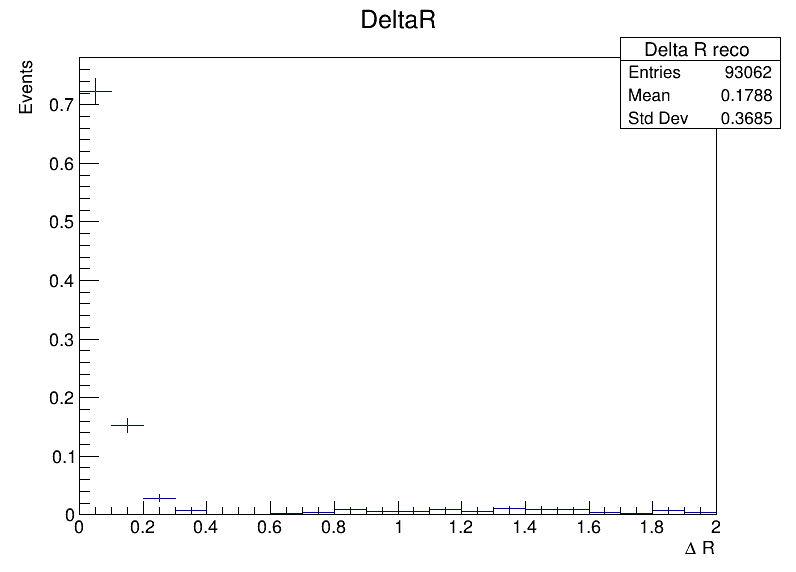

In [ ]:
hist_DR_reco_truth.Scale(1.0 / hist_DR_reco_truth.Integral())
hist_DR_reco_truth.SetMarkerColor(2)
hist_DR_reco_truth.DrawNormalized("")
canvas.Draw()

In [ ]:
hist_RecoJets_R4_pt_noJVF = ROOT.TH1F("RecoJets_R4_pt_noJVF", "RecoJets R4 pt (no JVF cut); pt; Events", 50, 10, 200)
hist_RecoJets_R4_pt_JVF = ROOT.TH1F("RecoJets_R4_pt_JVF", "RecoJets R4 pt (with JVF cut); pt; Events", 50, 10, 200)
hist_TruthJets_R4_pt = ROOT.TH1F("TruthJets_R4_pt", "TruthJets R4 pt; pt; Events", 50, 10, 200)
hist_Diff_pt_truth_reco_JVF = ROOT.TH1F("Diff_pt_truth_reco_JVF", "Diferencia in pt (truth - reco with JVF cut); pt diferencia; Events", 50, -50, 50)

for event in tree:
    # Llenar histogramas para jets reconstruidos sin el corte JVF y con el corte JVF
    if len(tree.RecoJets_R4_pt) > 0:
        hist_RecoJets_R4_pt_noJVF.Fill(tree.RecoJets_R4_pt[0], tree.EventWeight)

        if abs(tree.RecoJets_R4_jvf[0]) > 0.5:
            hist_RecoJets_R4_pt_JVF.Fill(tree.RecoJets_R4_pt[0], tree.EventWeight)

    # Llenar histograma para jets de verdad
    if len(tree.TruthJets_R4_pt) > 0 and tree.TruthJets_R4_pt[0] > 20000:
        hist_TruthJets_R4_pt.Fill(tree.TruthJets_R4_pt[0], tree.EventWeight)

        # Calcular la diferencia en pT entre jets de verdad y reconstruidos con corte JVF
        if len(tree.RecoJets_R4_pt) > 0 and abs(tree.RecoJets_R4_jvf[0]) > 0.5:
            diff_pt = tree.TruthJets_R4_pt[0] - tree.RecoJets_R4_pt[0]
            hist_Diff_pt_truth_reco_JVF.Fill(diff_pt, tree.EventWeight)

print("Done!")

Done!


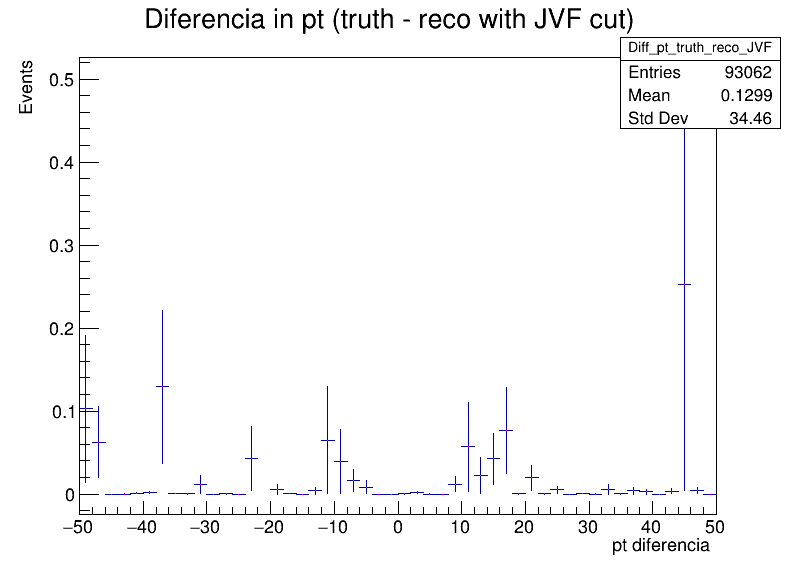

In [ ]:
# Normalizar histogramas si es necesario
integral_noJVF = hist_RecoJets_R4_pt_noJVF.GetSumOfWeights()
if integral_noJVF > 0:
    hist_RecoJets_R4_pt_noJVF.Scale(1.0 / integral_noJVF)

integral_JVF = hist_RecoJets_R4_pt_JVF.GetSumOfWeights()
if integral_JVF > 0:
    hist_RecoJets_R4_pt_JVF.Scale(1.0 / integral_JVF)

integral_Truth = hist_TruthJets_R4_pt.GetSumOfWeights()
if integral_Truth > 0:
    hist_TruthJets_R4_pt.Scale(1.0 / integral_Truth)

integral_Diff = hist_Diff_pt_truth_reco_JVF.GetSumOfWeights()
if integral_Diff > 0:
    hist_Diff_pt_truth_reco_JVF.Scale(1.0 / integral_Diff)

# Dibujar histogramas
hist_Diff_pt_truth_reco_JVF.SetMarkerColor(6)
hist_Diff_pt_truth_reco_JVF.DrawNormalized("")

# Mostrar el lienzo
canvas.Draw()

In [ ]:
hist_Lead_RecoJets_R4_pt = ROOT.TH1F("Lead_RecoJets_R4_pt","Lead_RecoJets_R4_pt; pt(GeV);Events",200,10,1000);
hist_Lead_RecoJets_R4_pt_05 = ROOT.TH1F("Lead_RecoJets_R4_pt_05","Lead_RecoJets_R4_pt_05; pt(GeV);Events",200,10,1000);
hist_Lead_TruthJets_R4_pt = ROOT.TH1F("Lead_TruthJets_R4_pt","Lead_TruthJets_R4_pt; pt(GeV);Events",200,0,1000);
hist_Lead_TruthJets_R4_pt_05 = ROOT.TH1F("Lead_TruthJets_R4_pt_05","Lead_TruthJets_R4_pt_05; pt(GeV);Events",200,0,1000);
for event in tree:
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.RecoJets_R4_pt.size()>0:
            hist_Lead_RecoJets_R4_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_RecoJets_R4_pt_05.Fill(tree.RecoJets_R4_pt.at(0)/1000,tree.EventWeight)
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.TruthJets_R4_pt.size()>0:
            hist_Lead_TruthJets_R4_pt.Fill(tree.TruthJets_R4_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_TruthJets_R4_pt_05.Fill(tree.TruthJets_R4_pt.at(0)/1000,tree.EventWeight)

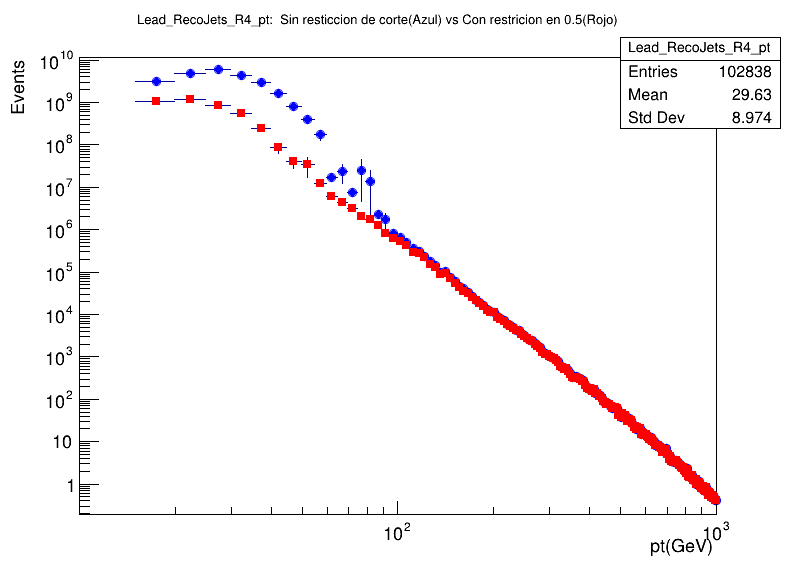

In [ ]:
hist_Lead_RecoJets_R4_pt.SetMarkerColor(4)
hist_Lead_RecoJets_R4_pt.SetMarkerStyle(20)
hist_Lead_RecoJets_R4_pt.SetTitle("Lead_RecoJets_R4_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_RecoJets_R4_pt.Draw()
hist_Lead_RecoJets_R4_pt_05.SetMarkerColor(2)
hist_Lead_RecoJets_R4_pt_05.SetMarkerStyle(21)
hist_Lead_RecoJets_R4_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx()
canvas.Draw()

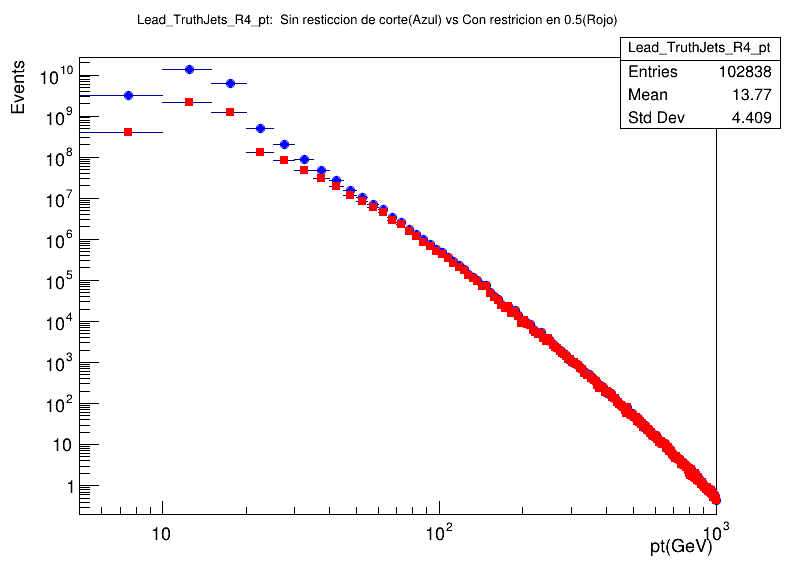

In [ ]:
hist_Lead_TruthJets_R4_pt.SetMarkerColor(4) #azul
hist_Lead_TruthJets_R4_pt.SetMarkerStyle(20)
hist_Lead_TruthJets_R4_pt.SetTitle("Lead_TruthJets_R4_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_RecoJets_R4_pt.Draw()
hist_Lead_TruthJets_R4_pt.Draw()
hist_Lead_TruthJets_R4_pt_05.SetMarkerColor(2)
hist_Lead_TruthJets_R4_pt_05.SetMarkerStyle(21)
hist_Lead_TruthJets_R4_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx()
canvas.Draw()

In [ ]:
hist_Lead_RecoJets_R10_pt = ROOT.TH1F("Lead_RecoJets_R10_pt","Lead_RecoJets_R10_pt; pt(GeV);Events",20,100,300);
hist_Lead_RecoJets_R10_pt_05 = ROOT.TH1F("Lead_RecoJets_R10_pt_05","Lead_RecoJets_R10_pt_05; pt(GeV);Events",20,100,300);
hist_Lead_TruthJets_R10_pt = ROOT.TH1F("Lead_TruthJets_R10_pt","Lead_TruthJets_R10_pt; pt(GeV);Events",20,100,300);
hist_Lead_TruthJets_R10_pt_05 = ROOT.TH1F("Lead_TruthJets_R10_pt_05","Lead_TruthJets_R10_pt_05; pt(GeV);Events",20,100,300);
for event in tree:
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.RecoJets_R10_pt.size()>0:
            hist_Lead_RecoJets_R10_pt.Fill(tree.RecoJets_R10_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_RecoJets_R10_pt_05.Fill(tree.RecoJets_R10_pt.at(0)/1000,tree.EventWeight)
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.TruthJets_R10_pt.size()>0:
            hist_Lead_TruthJets_R10_pt.Fill(tree.TruthJets_R10_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_TruthJets_R10_pt_05.Fill(tree.TruthJets_R10_pt.at(0)/1000,tree.EventWeight)

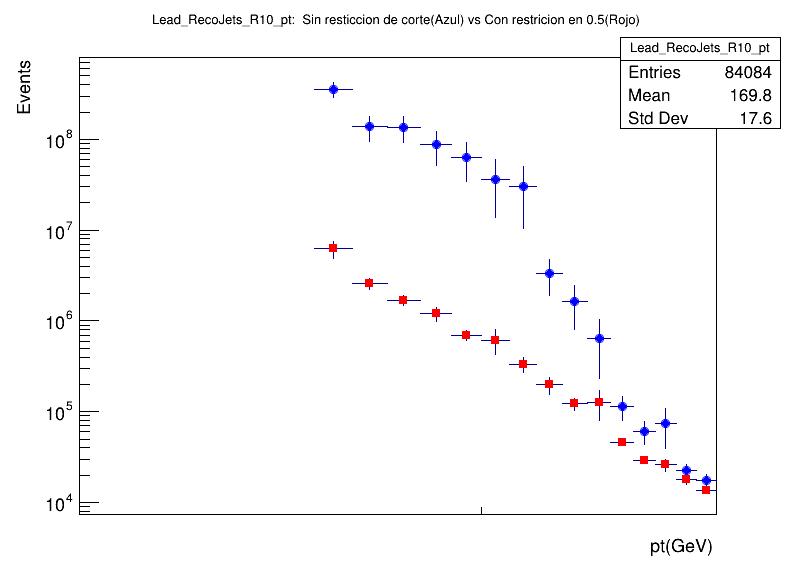

In [ ]:
hist_Lead_RecoJets_R10_pt.SetMarkerColor(4) #azul
hist_Lead_RecoJets_R10_pt.SetMarkerStyle(20)
hist_Lead_RecoJets_R10_pt.SetTitle("Lead_RecoJets_R10_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_RecoJets_R10_pt.Draw()
hist_Lead_RecoJets_R10_pt_05.SetMarkerColor(2)
hist_Lead_RecoJets_R10_pt_05.SetMarkerStyle(21)
hist_Lead_RecoJets_R10_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx()
canvas.Draw()

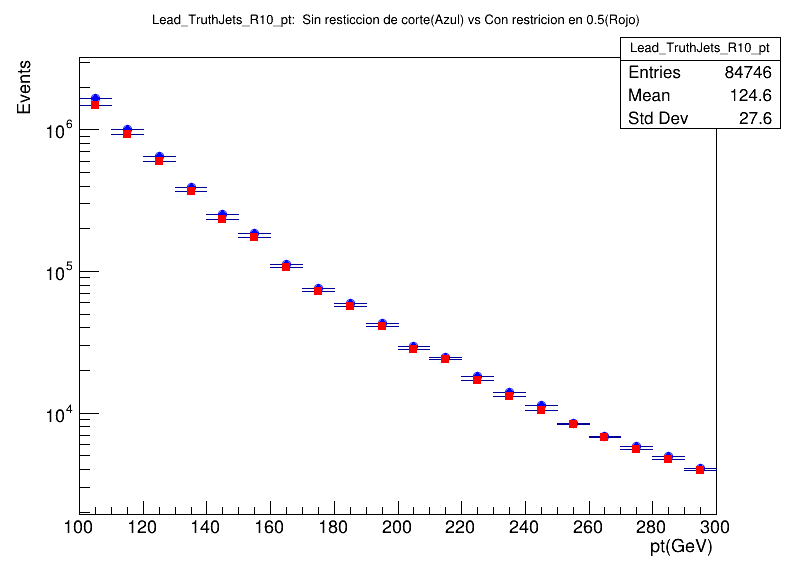

In [ ]:
hist_Lead_TruthJets_R10_pt.SetMarkerColor(4) #azul
hist_Lead_TruthJets_R10_pt.SetMarkerStyle(20)
hist_Lead_TruthJets_R10_pt.SetTitle("Lead_TruthJets_R10_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_TruthJets_R10_pt.Draw()
hist_Lead_TruthJets_R10_pt_05.SetMarkerColor(2)
hist_Lead_TruthJets_R10_pt_05.SetMarkerStyle(21)
hist_Lead_TruthJets_R10_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx(0)
canvas.Draw()

In [ ]:
hist_Lead_TrackJets_R4_pt = ROOT.TH1F("Lead_TrackJets_R4_pt","Lead_TrackJets_R4_pt; pt(GeV);Events",200,0,1000);
hist_Lead_TrackJets_R4_pt_05 = ROOT.TH1F("Lead_TrackJets_R4_pt_05","Lead_TrackJets_R4_pt_05; pt(GeV);Events",200,0,1000);
for event in tree:
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.TrackJets_R4_pt.size()>0:
            hist_Lead_TrackJets_R4_pt.Fill(tree.TrackJets_R4_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_TrackJets_R4_pt_05.Fill(tree.TrackJets_R4_pt.at(0)/1000,tree.EventWeight)

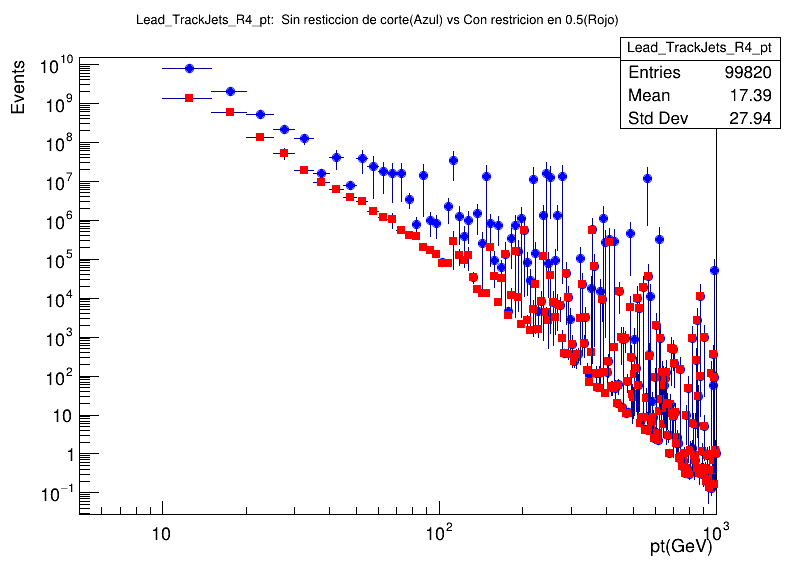

In [ ]:
hist_Lead_TrackJets_R4_pt.SetMarkerColor(4) #azul
hist_Lead_TrackJets_R4_pt.SetMarkerStyle(20)
hist_Lead_TrackJets_R4_pt.SetTitle("Lead_TrackJets_R4_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_TrackJets_R4_pt.Draw()
hist_Lead_TrackJets_R4_pt_05.SetMarkerColor(2) #rojo
hist_Lead_TrackJets_R4_pt_05.SetMarkerStyle(21)
hist_Lead_TrackJets_R4_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx(1)
canvas.Draw()

# *5. Repeat the same plots and comparisons with "Track-jets" and verify that they are stable against pileup*

In [ ]:
hist_Lead_RecoJets_R4_pt = ROOT.TH1F("Lead_RecoJets_R4_pt","Lead_RecoJets_R4_pt; pt(GeV);Events",20,10,100);
hist_Lead_RecoJets_R4_pt_05 = ROOT.TH1F("Lead_RecoJets_R4_pt_05","Lead_RecoJets_R4_pt_05; pt(GeV);Events",20,10,100);
hist_Lead_TruthJets_R4_pt = ROOT.TH1F("Lead_TruthJets_R4_pt","Lead_TruthJets_R4_pt; pt(GeV);Events",20,0,100);
hist_Lead_TruthJets_R4_pt_05 = ROOT.TH1F("Lead_TruthJets_R4_pt_05","Lead_TruthJets_R4_pt_05; pt(GeV);Events",20,0,100);
for event in tree:
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.RecoJets_R4_pt.size()>0:
            hist_Lead_RecoJets_R4_pt.Fill(tree.RecoJets_R4_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_RecoJets_R4_pt_05.Fill(tree.RecoJets_R4_pt.at(0)/1000,tree.EventWeight)
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.TruthJets_R4_pt.size()>0:
            hist_Lead_TruthJets_R4_pt.Fill(tree.TruthJets_R4_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_TruthJets_R4_pt_05.Fill(tree.TruthJets_R4_pt.at(0)/1000,tree.EventWeight)

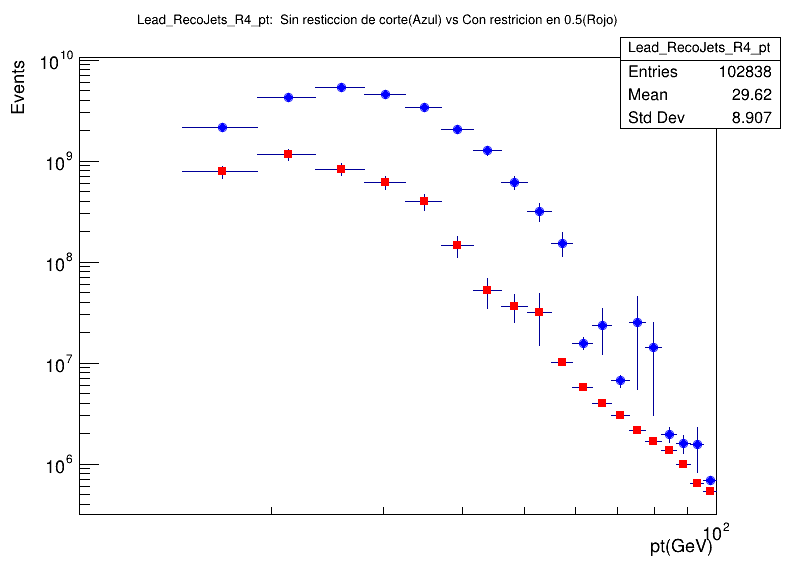

In [ ]:
hist_Lead_RecoJets_R4_pt.SetMarkerColor(4)
hist_Lead_RecoJets_R4_pt.SetMarkerStyle(20)
hist_Lead_RecoJets_R4_pt.SetTitle("Lead_RecoJets_R4_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_RecoJets_R4_pt.Draw()
hist_Lead_RecoJets_R4_pt_05.SetMarkerColor(2)
hist_Lead_RecoJets_R4_pt_05.SetMarkerStyle(21)
hist_Lead_RecoJets_R4_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx()
canvas.Draw()


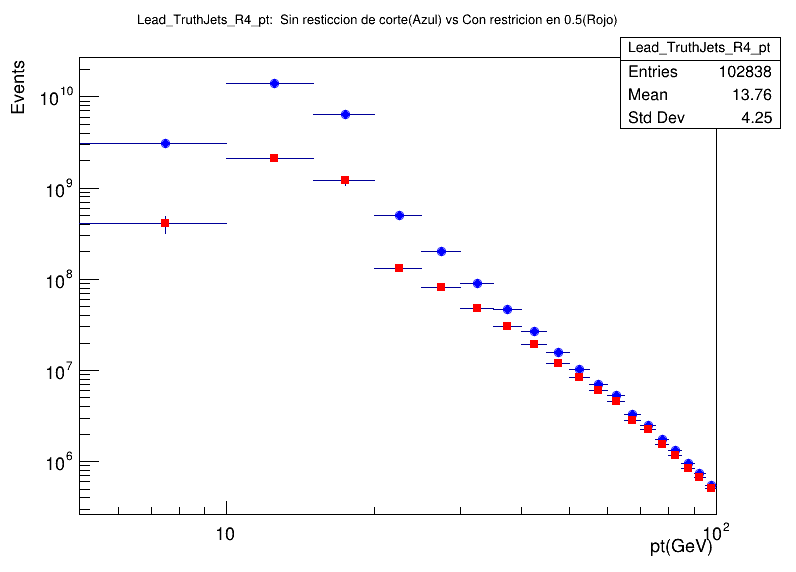

In [ ]:
hist_Lead_TruthJets_R4_pt.SetMarkerColor(4) #azul
hist_Lead_TruthJets_R4_pt.SetMarkerStyle(20)
hist_Lead_TruthJets_R4_pt.SetTitle("Lead_TruthJets_R4_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_TruthJets_R4_pt.Draw()
hist_Lead_TruthJets_R4_pt.Draw()
hist_Lead_TruthJets_R4_pt_05.SetMarkerColor(2)
hist_Lead_TruthJets_R4_pt_05.SetMarkerStyle(21)
hist_Lead_TruthJets_R4_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx()
canvas.Draw()

In [ ]:
hist_Lead_RecoJets_R10_pt = ROOT.TH1F("Lead_RecoJets_R10_pt","Lead_RecoJets_R10_pt; pt(GeV);Events",50,150,400);
hist_Lead_RecoJets_R10_pt_05 = ROOT.TH1F("Lead_RecoJets_R10_pt_05","Lead_RecoJets_R10_pt_05; pt(GeV);Events",50,150,400);
hist_Lead_TruthJets_R10_pt = ROOT.TH1F("Lead_TruthJets_R10_pt","Lead_TruthJets_R10_pt; pt(GeV);Events",20,100,300);
hist_Lead_TruthJets_R10_pt_05 = ROOT.TH1F("Lead_TruthJets_R10_pt_05","Lead_TruthJets_R10_pt_05; pt(GeV);Events",20,100,300);
for event in tree:
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.RecoJets_R10_pt.size()>0:
            hist_Lead_RecoJets_R10_pt.Fill(tree.RecoJets_R10_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_RecoJets_R10_pt_05.Fill(tree.RecoJets_R10_pt.at(0)/1000,tree.EventWeight)
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.TruthJets_R10_pt.size()>0:
            hist_Lead_TruthJets_R10_pt.Fill(tree.TruthJets_R10_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_TruthJets_R10_pt_05.Fill(tree.TruthJets_R10_pt.at(0)/1000,tree.EventWeight)

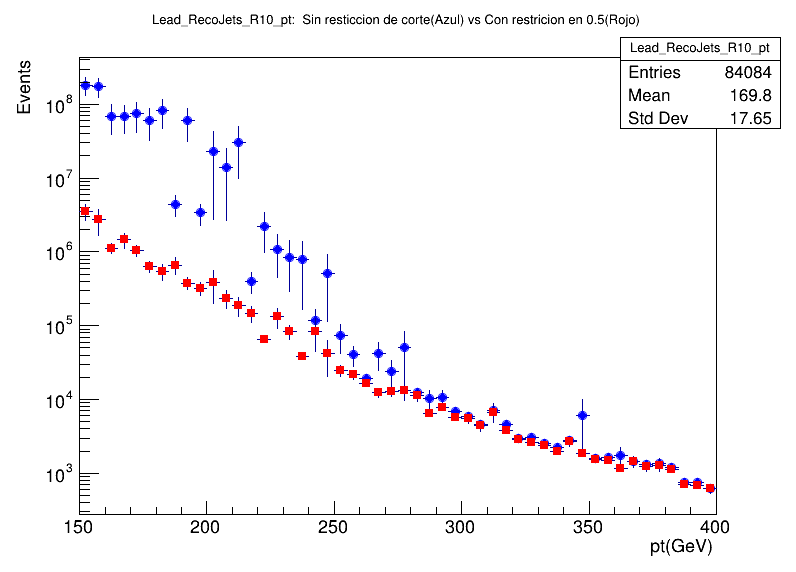

In [ ]:
hist_Lead_RecoJets_R10_pt.SetMarkerColor(4) #azul
hist_Lead_RecoJets_R10_pt.SetMarkerStyle(20)
hist_Lead_RecoJets_R10_pt.SetTitle("Lead_RecoJets_R10_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_RecoJets_R10_pt.Draw()
hist_Lead_RecoJets_R10_pt_05.SetMarkerColor(2)
hist_Lead_RecoJets_R10_pt_05.SetMarkerStyle(21)
hist_Lead_RecoJets_R10_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx(0)
canvas.Draw()

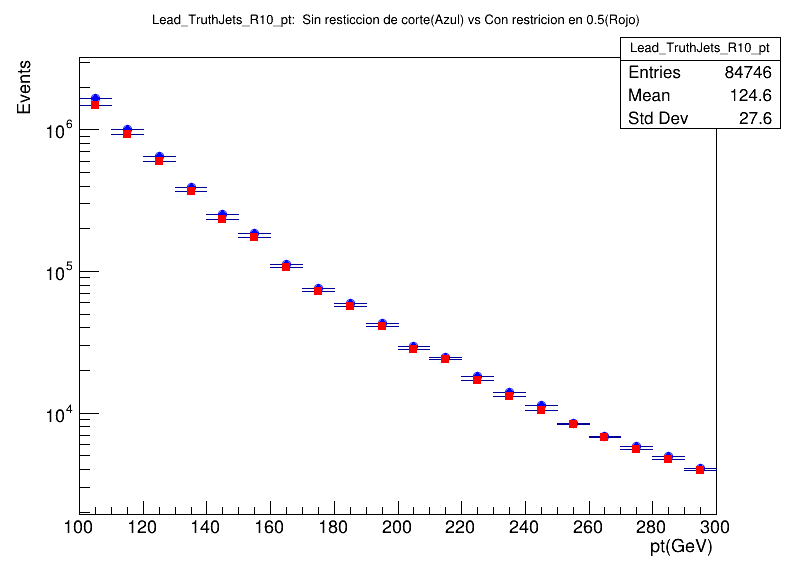

In [ ]:
hist_Lead_TruthJets_R10_pt.SetMarkerColor(4) #azul
hist_Lead_TruthJets_R10_pt.SetMarkerStyle(20)
hist_Lead_TruthJets_R10_pt.SetTitle("Lead_TruthJets_R10_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_TruthJets_R10_pt.Draw()
hist_Lead_TruthJets_R10_pt_05.SetMarkerColor(2)
hist_Lead_TruthJets_R10_pt_05.SetMarkerStyle(21)
hist_Lead_TruthJets_R10_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx(0)
canvas.Draw()

In [ ]:
hist_Lead_TrackJets_R4_pt = ROOT.TH1F("Lead_TrackJets_R4_pt","Lead_TrackJets_R4_pt; pt(GeV);Events",99,10,1000);
hist_Lead_TrackJets_R4_pt_05 = ROOT.TH1F("Lead_TrackJets_R4_pt_05","Lead_TrackJets_R4_pt_05; pt(GeV);Events",99,10,1000);
for event in tree:
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.TrackJets_R4_pt.size()>0:
            hist_Lead_TrackJets_R4_pt.Fill(tree.TrackJets_R4_pt.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_TrackJets_R4_pt_05.Fill(tree.TrackJets_R4_pt.at(0)/1000,tree.EventWeight)

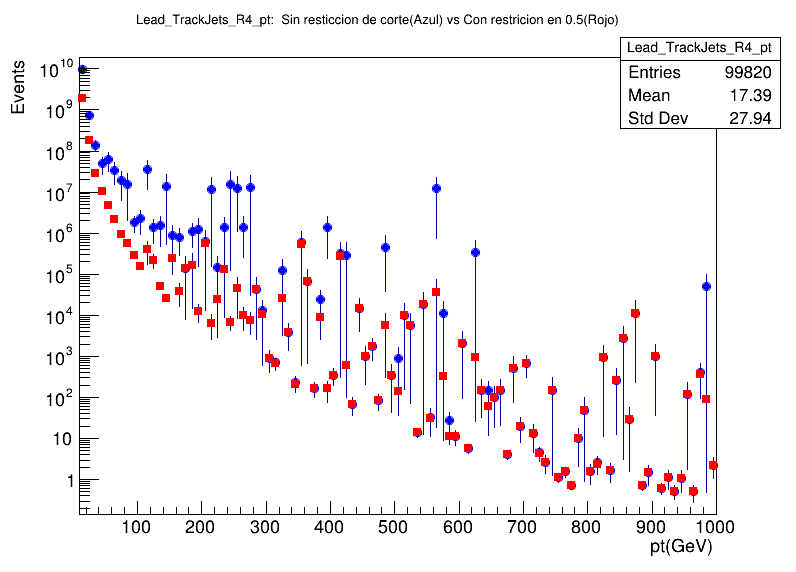

In [ ]:
hist_Lead_TrackJets_R4_pt.SetMarkerColor(4) #azul
hist_Lead_TrackJets_R4_pt.SetMarkerStyle(20)
hist_Lead_TrackJets_R4_pt.SetTitle("Lead_TrackJets_R4_pt:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_TrackJets_R4_pt.Draw()
hist_Lead_TrackJets_R4_pt_05.SetMarkerColor(2) #rojo
hist_Lead_TrackJets_R4_pt_05.SetMarkerStyle(21)
hist_Lead_TrackJets_R4_pt_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx(0)
canvas.Draw()

In [ ]:
hist_Lead_TrackJets_R4_m = ROOT.TH1F("Lead_TrackJets_R4_m","Lead_TrackJets_R4_m; m(GeV);Events",100,0,1000);
hist_Lead_TrackJets_R4_m_05 = ROOT.TH1F("Lead_TrackJets_R4_m_05","Lead_TrackJets_R4_m_05; m(GeV);Events",100,0,1000);
for event in tree:
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.TrackJets_R4_m.size()>0:
            hist_Lead_TrackJets_R4_m.Fill(tree.TrackJets_R4_m.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_TrackJets_R4_m_05.Fill(tree.TrackJets_R4_m.at(0)/1000,tree.EventWeight)

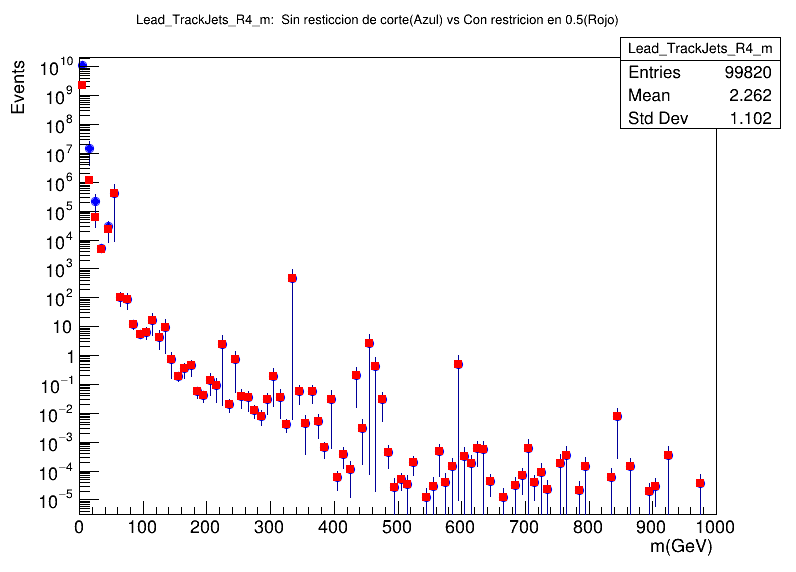

In [ ]:
hist_Lead_TrackJets_R4_m.SetMarkerColor(4) #azul
hist_Lead_TrackJets_R4_m.SetMarkerStyle(20)
hist_Lead_TrackJets_R4_m.SetTitle("Lead_TrackJets_R4_m:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_TrackJets_R4_m.Draw()
hist_Lead_TrackJets_R4_m_05.SetMarkerColor(2) #rojo
hist_Lead_TrackJets_R4_m_05.SetMarkerStyle(21)
hist_Lead_TrackJets_R4_m_05.Draw("same")
canvas.SetLogy()
canvas.SetLogx(0)
canvas.Draw()

In [ ]:
hist_Lead_TrackJets_R4_eta = ROOT.TH1F("Lead_TrackJets_R4_m","Lead_TrackJets_R4_m; eta;Events",50,-2.5,2.5);
hist_Lead_TrackJets_R4_eta_05 = ROOT.TH1F("Lead_TrackJets_R4_m_05","Lead_TrackJets_R4_m_05; eta;Events",50,-2.5,2.5);
for event in tree:
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.TrackJets_R4_eta.size()>0:
            hist_Lead_TrackJets_R4_eta.Fill(tree.TrackJets_R4_eta.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_TrackJets_R4_eta_05.Fill(tree.TrackJets_R4_eta.at(0)/1000,tree.EventWeight)

Warning in <TDavixFile::Append>: Replacing existing TH1: Lead_TrackJets_R4_m (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: Lead_TrackJets_R4_m_05 (Potential memory leak).


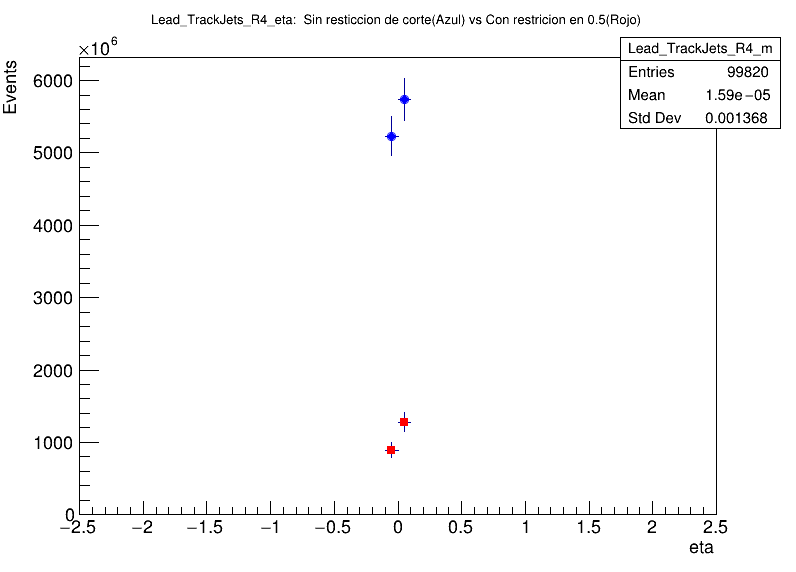

In [ ]:
hist_Lead_TrackJets_R4_eta.SetMarkerColor(4) #azul
hist_Lead_TrackJets_R4_eta.SetMarkerStyle(20)
hist_Lead_TrackJets_R4_eta.SetTitle("Lead_TrackJets_R4_eta:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_TrackJets_R4_eta.Draw()
hist_Lead_TrackJets_R4_eta_05.SetMarkerColor(2) #rojo
hist_Lead_TrackJets_R4_eta_05.SetMarkerStyle(21)
hist_Lead_TrackJets_R4_eta_05.Draw("same")
canvas.SetLogy(0)
canvas.SetLogx(0)
canvas.Draw()

In [ ]:
hist_Lead_TrackJets_R4_phi = ROOT.TH1F("Lead_TrackJets_R4_phi","Lead_TrackJets_R4_phi; phi;Events",50,-3.14,3.14);
hist_Lead_TrackJets_R4_phi_05 = ROOT.TH1F("Lead_TrackJets_R4_phi_05","Lead_TrackJets_R4_phi_05; phi;Events",50,-3.14,3.14);
for event in tree:
    if tree.RecoJets_R4_jvf.size()>0:
        if tree.TrackJets_R4_phi.size()>0:
            hist_Lead_TrackJets_R4_phi.Fill(tree.TrackJets_R4_phi.at(0)/1000,tree.EventWeight)
            if abs(tree.RecoJets_R4_jvf.at(0))>0.5:
                hist_Lead_TrackJets_R4_phi_05.Fill(tree.TrackJets_R4_phi.at(0)/1000,tree.EventWeight)

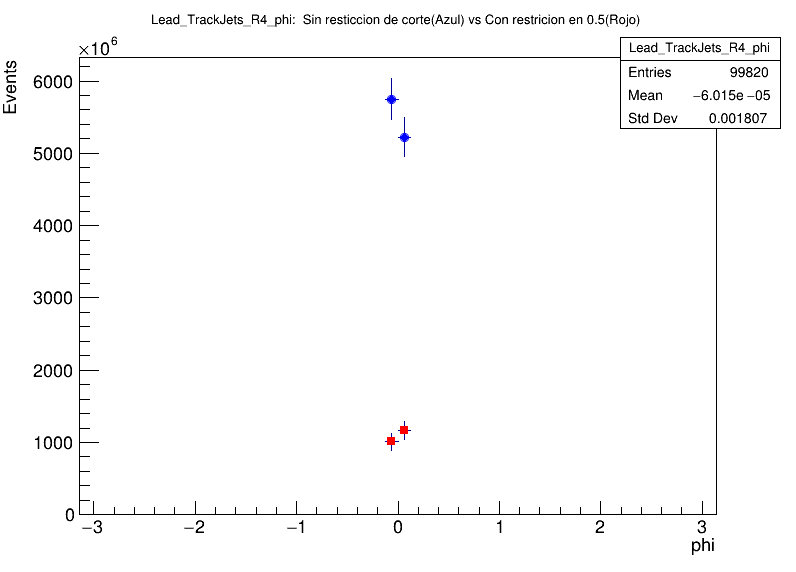

In [ ]:
hist_Lead_TrackJets_R4_phi.SetMarkerColor(4) #azul
hist_Lead_TrackJets_R4_phi.SetMarkerStyle(20)
hist_Lead_TrackJets_R4_phi.SetTitle("Lead_TrackJets_R4_phi:  Sin resticcion de corte(Azul) vs Con restricion en 0.5(Rojo) ")
hist_Lead_TrackJets_R4_phi.Draw()
hist_Lead_TrackJets_R4_phi_05.SetMarkerColor(2) #rojo
hist_Lead_TrackJets_R4_phi_05.SetMarkerStyle(21)
hist_Lead_TrackJets_R4_phi_05.Draw("same")
canvas.SetLogy(0)
canvas.SetLogx(0)
canvas.Draw()

# *6. Repeat for track-jets and make a plot comparing three cases: reco-jets with and without the JVF cut, and track-jets*

In [ ]:
hist_DR_reco_truth=ROOT.TH1F("Delta R reco","DeltaR; #Delta R; Events",20,0,2)
hist_DR_Truth_Track=ROOT.TH1F("Delta R reco","DeltaR; #Delta R; Events",20,0,2)
hist_DR_reco_Track=ROOT.TH1F("Delta R reco","DeltaR; #Delta R; Events",20,0,2)
for event in tree:
    if tree.TruthJets_R4_pt.size()>0 and tree.TruthJets_R4_pt.at(0) > 20000:
        truthJet = ROOT.TLorentzVector()
        truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt.at(0), tree.TruthJets_R4_eta.at(0), tree.TruthJets_R4_phi.at(0), tree.TruthJets_R4_m.at(0))
        if tree.RecoJets_R4_pt.size()>0 and abs(tree.RecoJets_R4_jvf.at(0)) > 0.5:
            recoJet = ROOT.TLorentzVector()
            recoJet.SetPtEtaPhiM(tree.RecoJets_R4_pt.at(0), tree.RecoJets_R4_eta.at(0), tree.RecoJets_R4_phi.at(0), tree.RecoJets_R4_m.at(0))
            hist_DR_reco_truth.Fill(truthJet.DeltaR(recoJet), tree.EventWeight)
    if tree.TruthJets_R4_pt.size()>0 and tree.TruthJets_R4_pt.at(0) > 20000:
        truthJet = ROOT.TLorentzVector()
        truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt.at(0), tree.TruthJets_R4_eta.at(0), tree.TruthJets_R4_phi.at(0), tree.TruthJets_R4_m.at(0))
        if tree.TrackJets_R4_pt.size()>0 and tree.TrackJets_R4_pt.at(0) > 20000:
            TrackJets = ROOT.TLorentzVector()
            TrackJets.SetPtEtaPhiM(tree.TrackJets_R4_pt.at(0), tree.TrackJets_R4_eta.at(0), tree.TrackJets_R4_phi.at(0), tree.TrackJets_R4_m.at(0))
            hist_DR_Truth_Track.Fill(truthJet.DeltaR(TrackJets), tree.EventWeight)
    if tree.RecoJets_R4_pt.size()>0 and abs(tree.RecoJets_R4_jvf.at(0)) > 0.5:
        recoJet = ROOT.TLorentzVector()
        recoJet.SetPtEtaPhiM(tree.RecoJets_R4_pt.at(0), tree.RecoJets_R4_eta.at(0), tree.RecoJets_R4_phi.at(0), tree.RecoJets_R4_m.at(0))
        if tree.TrackJets_R4_pt.size()>0 and tree.TrackJets_R4_pt.at(0) > 20000:
            TrackJets = ROOT.TLorentzVector()
            TrackJets.SetPtEtaPhiM(tree.TrackJets_R4_pt.at(0), tree.TrackJets_R4_eta.at(0), tree.TrackJets_R4_phi.at(0), tree.TrackJets_R4_m.at(0))
            hist_DR_reco_Track.Fill(recoJet.DeltaR(TrackJets), tree.EventWeight)

Warning in <TDavixFile::Append>: Replacing existing TH1: Delta R reco (Potential memory leak).
Warning in <TDavixFile::Append>: Replacing existing TH1: Delta R reco (Potential memory leak).


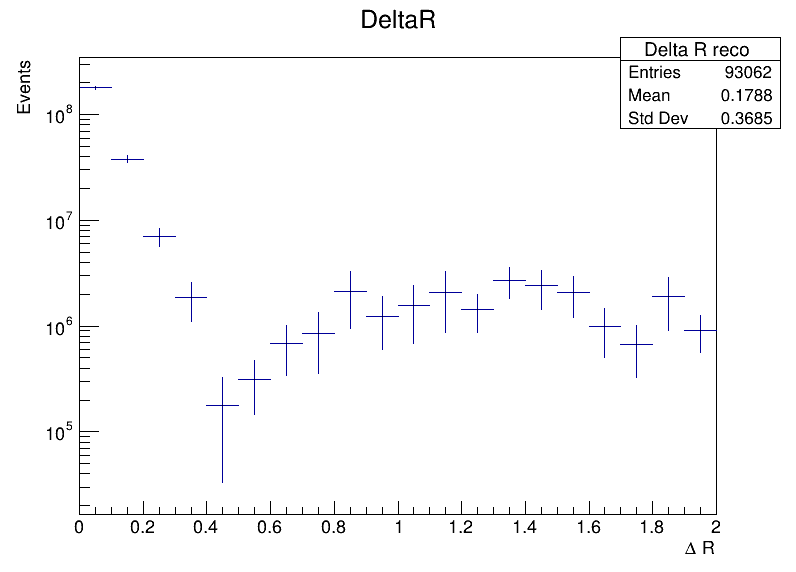

In [ ]:
hist_DR_reco_truth.Draw()
canvas.Draw()

In [ ]:
hist_DR_reco_truth.Scale(1/hist_DR_reco_truth.Integral())
hist_DR_reco_truth.DrawNormalized()
canvas.Draw()

# *7. Plot the response: For matched jets (use DeltaR<0.3), plot pTjet/pTtruth for 3 cases: truth_pT>20 GeV, 100 GeV, 500 GeV. Do this for track jets and reco jets (two plots).*

In [ ]:
hist_response_20GeV = ROOT.TH1F("Response_20GeV", "Respuesta (pTjet/pTtruth, truth_pT > 20 GeV); Respuesta; Events", 100, 0, 2)

for event in tree:
    if tree.TruthJets_R4_pt.size() > 0 and tree.RecoJets_R4_pt.size() > 0:
        if tree.TruthJets_R4_pt[0] > 20000:
            truthJet = ROOT.TLorentzVector()
            truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt[0], tree.TruthJets_R4_eta[0], tree.TruthJets_R4_phi[0], tree.TruthJets_R4_m[0])

            recoJet = ROOT.TLorentzVector()
            recoJet.SetPtEtaPhiM(tree.RecoJets_R4_pt[0], tree.RecoJets_R4_eta[0], tree.RecoJets_R4_phi[0], tree.RecoJets_R4_m[0])

            # Calcular Delta R
            deltaR = truthJet.DeltaR(recoJet)

         # Aplicar la condición Delta R < 0.3
            if deltaR < 0.3:
                # Calcular la respuesta
                response1 = recoJet.Pt() / truthJet.Pt()

                # Llenar histograma
                hist_response_20GeV.Fill(response1, event.EventWeight)
print("Done!")

Done!


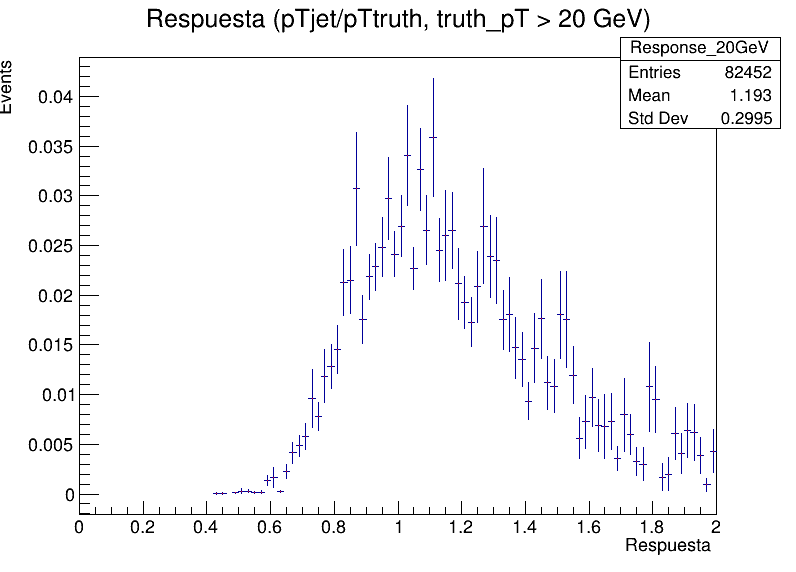

In [ ]:
hist_response_20GeV.Scale(1.0 / hist_response_20GeV.Integral())
hist_response_20GeV.SetMarkerColor(2)
hist_response_20GeV.DrawNormalized("")
canvas.Draw()

In [ ]:
hist_response_100GeV = ROOT.TH1F("Response_100GeV", "Respuesta (pTjet/pTtruth, truth_pT > 100 GeV); Respuesta; Events", 100, 0, 2)

for event in tree:
    if tree.TruthJets_R4_pt.size() > 0 and tree.RecoJets_R4_pt.size() > 0:
        if tree.TruthJets_R4_pt[0] > 100000:
            truthJet = ROOT.TLorentzVector()
            truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt[0], tree.TruthJets_R4_eta[0], tree.TruthJets_R4_phi[0], tree.TruthJets_R4_m[0])

            recoJet = ROOT.TLorentzVector()
            recoJet.SetPtEtaPhiM(tree.RecoJets_R4_pt[0], tree.RecoJets_R4_eta[0], tree.RecoJets_R4_phi[0], tree.RecoJets_R4_m[0])

            # Calcular Delta R
            deltaR = truthJet.DeltaR(recoJet)

            # Aplicar la condición Delta R < 0.3
            if deltaR < 0.3:
                # Calcular la respuesta
                response2 = recoJet.Pt() / truthJet.Pt()

                # Llenar el histograma
                hist_response_100GeV.Fill(response2, event.EventWeight)

print("Done!")

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: Response_100GeV (Potential memory leak).


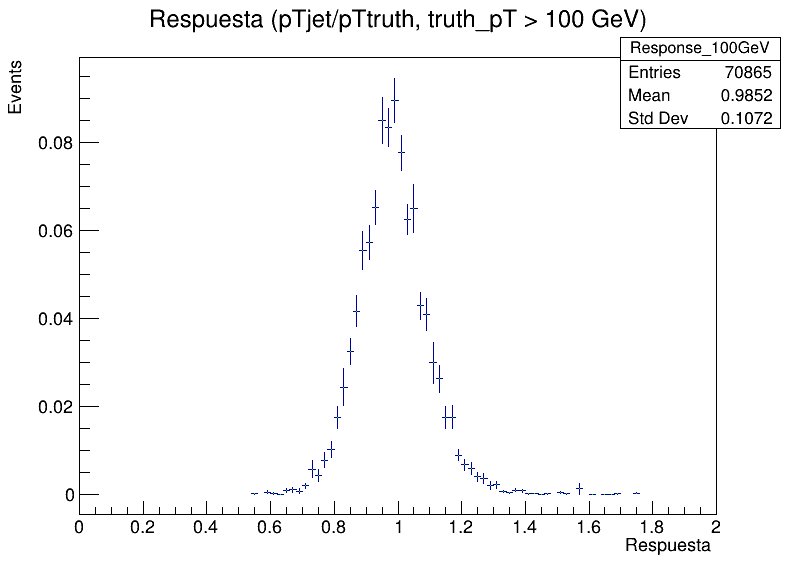

In [ ]:
hist_response_100GeV.Scale(1.0 / hist_response_100GeV.Integral())
hist_response_100GeV.SetMarkerColor(3)
hist_response_100GeV.DrawNormalized("")
canvas.Draw()

In [ ]:
hist_response_500GeV = ROOT.TH1F("Response_500GeV", "Respuesta (pTjet/pTtruth, truth_pT > 500 GeV); Respuesta; Events", 100, 0, 2)

for event in tree:
    if tree.TruthJets_R4_pt.size() > 0 and tree.RecoJets_R4_pt.size() > 0:
        if tree.TruthJets_R4_pt[0] > 500000:
            truthJet = ROOT.TLorentzVector()
            truthJet.SetPtEtaPhiM(tree.TruthJets_R4_pt[0], tree.TruthJets_R4_eta[0], tree.TruthJets_R4_phi[0], tree.TruthJets_R4_m[0])

            recoJet = ROOT.TLorentzVector()
            recoJet.SetPtEtaPhiM(tree.RecoJets_R4_pt[0], tree.RecoJets_R4_eta[0], tree.RecoJets_R4_phi[0], tree.RecoJets_R4_m[0])

            # Calcular Delta R
            deltaR = truthJet.DeltaR(recoJet)

            # Aplicar la condición Delta R < 0.3
            if deltaR < 0.3:
                # Calcular la respuesta
                response3 = recoJet.Pt() / truthJet.Pt()

                # Llenar histograma
                hist_response_500GeV.Fill(response3, event.EventWeight)

print("Done!")

Done!


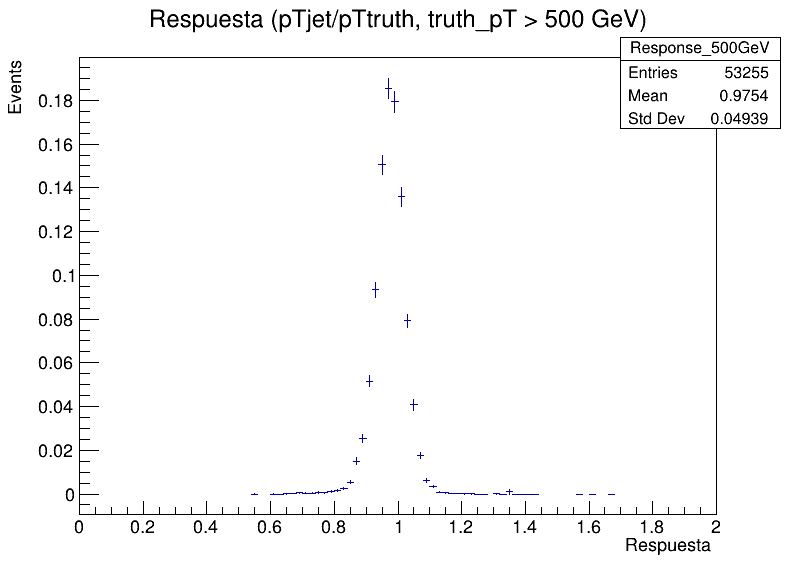

In [ ]:
hist_response_500GeV.Scale(1.0 / hist_response_500GeV.Integral())
hist_response_500GeV.SetMarkerColor(4)
hist_response_500GeV.DrawNormalized("")
canvas.Draw()

#*8. Investigate the Large-R jets*


R10_pt (Reco y Truth)

In [ ]:
hist_TruthJets_R10_pt= ROOT.TH1F("TruthJets_R4_pt"," Truth Jets R10_pt; pt; Events ",50,10,1000)

for event in tree:
    if tree.TruthJets_R10_pt.size()>0:
        hist_TruthJets_R10_pt.Fill(tree.TruthJets_R10_pt.at(0)/1000,tree.EventWeight)
print("Done!")

Done!


Warning in <TDavixFile::Append>: Replacing existing TH1: TruthJets_R4_pt (Potential memory leak).


In [ ]:
hist_RecoJets_R10_pt= ROOT.TH1F("RecoJets_R4_pt"," Reco Jets R10_pt; pt; Events ",50,10,1000)

for event in tree:
    if tree.RecoJets_R10_pt.size()>0:
       hist_RecoJets_R10_pt.Fill(tree.RecoJets_R10_pt.at(0)/1000,tree.EventWeight)
print("Done!")

Done!


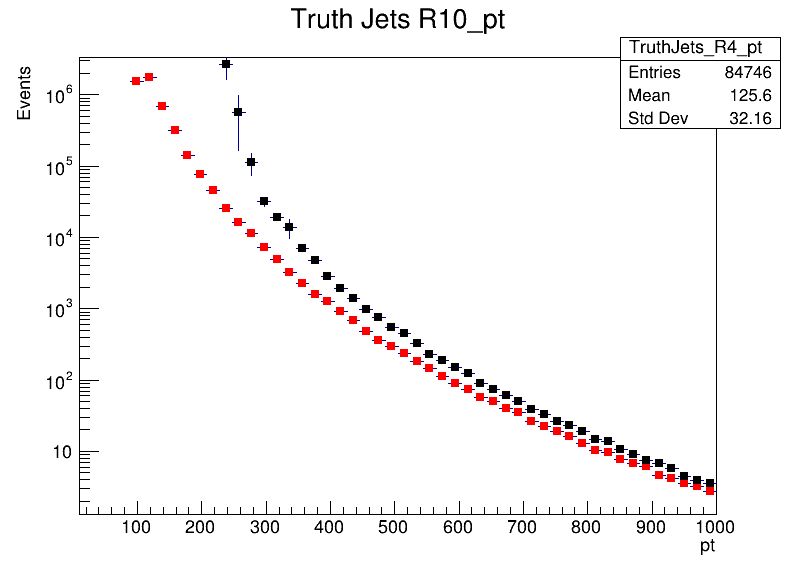

In [ ]:
hist_TruthJets_R10_pt.SetMarkerColor(2)
hist_TruthJets_R10_pt.SetMarkerStyle(21)
hist_TruthJets_R10_pt.Draw()
hist_RecoJets_R10_pt.SetMarkerStyle(21)
hist_RecoJets_R10_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

R10_pt (Reco y Truth, Trimmed)

In [ ]:
hist_TruthJets_R10_Trimmed_pt= ROOT.TH1F("TruthJets_R10_Trimmed_pt"," Truth Jets R10_pt Trimmed; pt; Events ",50,10,1000)

for event in tree:
    if tree.TruthJets_R10_Trimmed_pt.size()>0:
        hist_TruthJets_R10_Trimmed_pt.Fill(tree.TruthJets_R10_Trimmed_pt.at(0)/1000,tree.EventWeight)
print("Done!")

hist_RecoJets_R10_Trimmed_pt= ROOT.TH1F("RecoJets_R10_Trimmed_pt"," Reco Jets R10_pt; pt Trimmed; Events ",50,10,1000)

for event in tree:
    if tree.RecoJets_R10_Trimmed_pt.size()>0:
       hist_RecoJets_R10_Trimmed_pt.Fill(tree.RecoJets_R10_Trimmed_pt.at(0)/1000,tree.EventWeight)
print("Done!")

Done!
Done!


Warning in <TClassTable::Add>: class TEllipse already in TClassTable
Warning in <TClassTable::Add>: class TArc already in TClassTable
Warning in <TClassTable::Add>: class TLine already in TClassTable
Warning in <TClassTable::Add>: class TArrow already in TClassTable
Warning in <TClassTable::Add>: class TPaletteEditor already in TClassTable
Warning in <TClassTable::Add>: class TImagePalette already in TClassTable
Warning in <TClassTable::Add>: class TAttImage already in TClassTable
Warning in <TClassTable::Add>: class TBox already in TClassTable
Warning in <TClassTable::Add>: class TCandle already in TClassTable
Warning in <TClassTable::Add>: class TCrown already in TClassTable
Warning in <TClassTable::Add>: class TPolyLine already in TClassTable
Warning in <TClassTable::Add>: class TCurlyLine already in TClassTable
Warning in <TClassTable::Add>: class TCurlyArc already in TClassTable
Warning in <TClassTable::Add>: class TCutG already in TClassTable
Warning in <TClassTable::Add>: class 

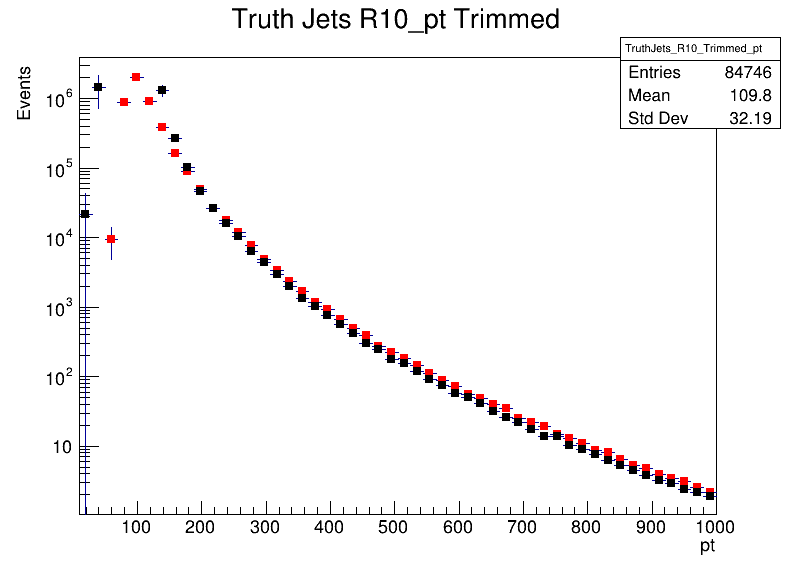

In [ ]:
hist_TruthJets_R10_Trimmed_pt.SetMarkerColor(2)
hist_TruthJets_R10_Trimmed_pt.SetMarkerStyle(21)
hist_TruthJets_R10_Trimmed_pt.Draw()
hist_RecoJets_R10_Trimmed_pt.SetMarkerStyle(21)
hist_RecoJets_R10_Trimmed_pt.Draw("same")
canvas.SetLogy()
canvas.Draw()

## *Make the same comparisson for the jet mass*

R10_m (Reco y Truth)

In [ ]:
hist_TruthJets_R10_m= ROOT.TH1F("TruthJets_R4_m"," Truth Jets R10_m; MeV; Events ",50,10,1000)

for event in tree:
    if tree.TruthJets_R10_m.size()>0:
        hist_TruthJets_R10_m.Fill(tree.TruthJets_R10_m.at(0)/1000,tree.EventWeight)
print("Done!")

Done!


In [ ]:
hist_RecoJets_R10_m= ROOT.TH1F("RecoJets_R10_m"," Reco Jets R10_m; MeV; Events ",50,10,1000)

for event in tree:
    if tree.RecoJets_R10_m.size()>0:
        hist_RecoJets_R10_m.Fill(tree.RecoJets_R10_m.at(0)/1000,tree.EventWeight)
print("Done!")

Done!


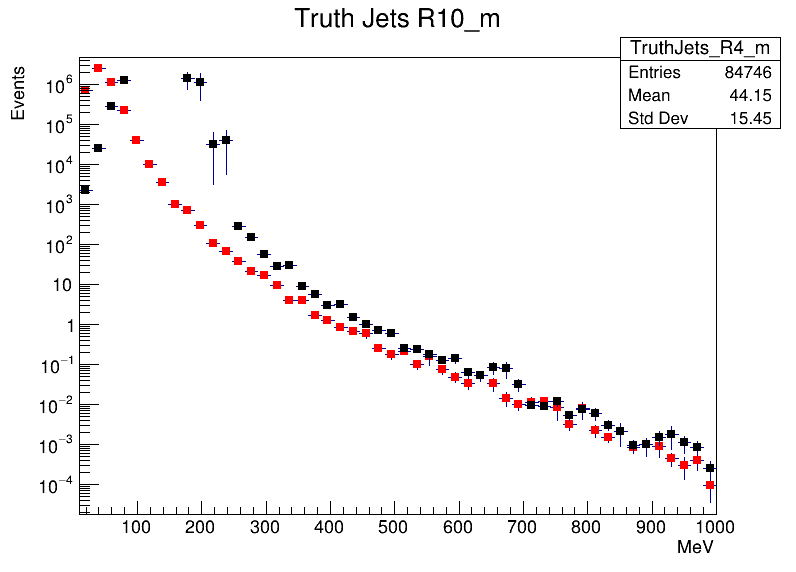

In [ ]:
hist_TruthJets_R10_m.SetMarkerColor(2)
hist_TruthJets_R10_m.SetMarkerStyle(21)
hist_TruthJets_R10_m.Draw()
hist_RecoJets_R10_m.SetMarkerStyle(21)
hist_RecoJets_R10_m.Draw("same")
canvas.SetLogy()
canvas.Draw()

R10_m (Reco y Truth,Trimmed)

In [ ]:
hist_TruthJets_R10_Trimmed_m= ROOT.TH1F("TruthJets_R10_Trimmed_m"," Truth Jets R10_m Trimmed; MeV; Events ",50,10,1000)

for event in tree:
    if tree.TruthJets_R10_Trimmed_m.size()>0:
        hist_TruthJets_R10_Trimmed_m.Fill(tree.TruthJets_R10_Trimmed_m.at(0)/1000,tree.EventWeight)
print("Done!")

hist_RecoJets_R10_Trimmed_m= ROOT.TH1F("RecoJets_R10_Trimmed_m"," Reco Jets R10_m Trimmed; MeV; Events ",50,10,1000)

for event in tree:
    if tree.RecoJets_R10_Trimmed_m.size()>0:
       hist_RecoJets_R10_Trimmed_m.Fill(tree.RecoJets_R10_Trimmed_m.at(0)/1000,tree.EventWeight)
print("Done!")

Done!
Done!


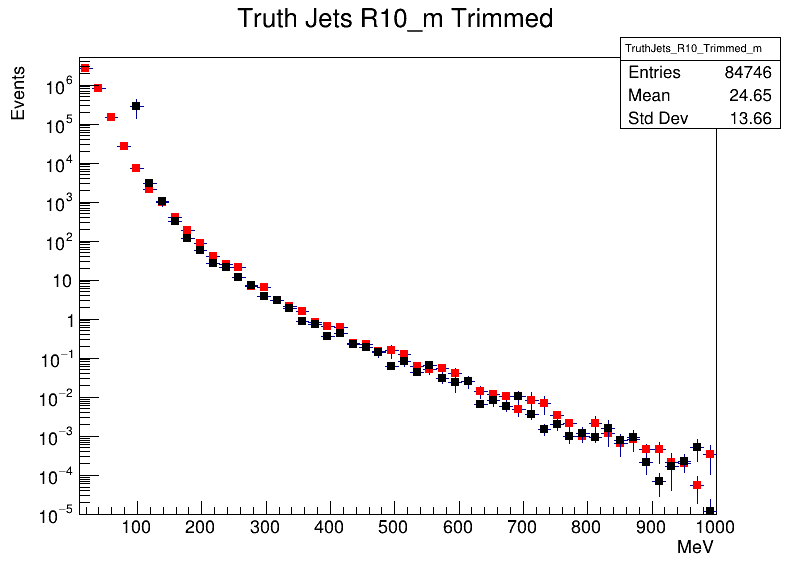

In [ ]:
hist_TruthJets_R10_Trimmed_m.SetMarkerColor(2)
hist_TruthJets_R10_Trimmed_m.SetMarkerStyle(21)
hist_TruthJets_R10_Trimmed_m.Draw()
hist_RecoJets_R10_Trimmed_m.SetMarkerStyle(21)
hist_RecoJets_R10_Trimmed_m.Draw("same")
canvas.SetLogy()
canvas.Draw()